In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('application_data.csv')
df1=pd.read_csv('previous_application.csv')
df2=pd.read_csv('columns_description.csv')

### Checking Application Data.csv

In [3]:
df.shape

(307511, 122)

In [4]:
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
pd.set_option('max_columns',None)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### While checking data we observed 'XAP','XNA' as common, which stands for Not applicable. replacing them with Null. Also lets drop duplicates if any all data sets

In [6]:
df.replace(to_replace=['XAP','XNA'],value=np.nan,inplace=True)
df.drop_duplicates(inplace=True)
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [7]:
# Creating a Data frame with missing value data percent per column
x=pd.DataFrame(df.isnull().sum()/df.shape[0]*100>40,columns=['Status'])
x['Missing_Value_percent']=df.isnull().sum()/df.shape[0]*100
x[x.Status==True].head()

Status  Missing_Value_percent
OWN_CAR_AGE                    True              65.990810
EXT_SOURCE_1                   True              56.381073
APARTMENTS_AVG                 True              50.749729
BASEMENTAREA_AVG               True              58.515956
YEARS_BEGINEXPLUATATION_AVG    True              48.781019

In [8]:
l1=list(x[x.Status==True].index)
print(l1,'\n\n','Number of column to be dropped due to 40% or above null values = '+str(len(l1)))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

#### Verifying any relevant columns are getting dropped using column description

In [9]:
df0=pd.DataFrame(columns=['Row','Description'])
for x in df2.Row:
    if x in l1:
        df0=df0.append((df2[df2.Row==x].iloc[:,2:4]),ignore_index = True)
df0

Row  \
0                    OWN_CAR_AGE   
1                   EXT_SOURCE_1   
2                 APARTMENTS_AVG   
3               BASEMENTAREA_AVG   
4    YEARS_BEGINEXPLUATATION_AVG   
5                YEARS_BUILD_AVG   
6                 COMMONAREA_AVG   
7                  ELEVATORS_AVG   
8                  ENTRANCES_AVG   
9                  FLOORSMAX_AVG   
10                 FLOORSMIN_AVG   
11                  LANDAREA_AVG   
12          LIVINGAPARTMENTS_AVG   
13                LIVINGAREA_AVG   
14       NONLIVINGAPARTMENTS_AVG   
15             NONLIVINGAREA_AVG   
16               APARTMENTS_MODE   
17             BASEMENTAREA_MODE   
18  YEARS_BEGINEXPLUATATION_MODE   
19              YEARS_BUILD_MODE   
20               COMMONAREA_MODE   
21                ELEVATORS_MODE   
22                ENTRANCES_MODE   
23                FLOORSMAX_MODE   
24                FLOORSMIN_MODE   
25                 LANDAREA_MODE   
26         LIVINGAPARTMENTS_MODE   
27               LIVINGAREA_MODE   
28      NONLIVINGAPARTMENTS_MODE   
29            NONLIVINGAREA_MODE   
30               APARTMENTS_MEDI   
31             BASEMENTAREA_MEDI   
32  YEARS_BEGINEXPLUATATION_MEDI   
33              YEARS_BUILD_MEDI   
34               COMMONAREA_MEDI   
35                ELEVATORS_MEDI   
36                ENTRANCES_MEDI   
37                FLOORSMAX_MEDI   
38                FLOORSMIN_MEDI   
39                 LANDAREA_MEDI   
40         LIVINGAPARTMENTS_MEDI   
41               LIVINGAREA_MEDI   
42      NONLIVINGAPARTMENTS_MEDI   
43            NONLIVINGAREA_MEDI   
44            FONDKAPREMONT_MODE   
45                HOUSETYPE_MODE   
46                TOTALAREA_MODE   
47            WALLSMATERIAL_MODE   
48           EMERGENCYSTATE_MODE   

                                          Description  
0                                 Age of client's car  
1          Normalized score from external data source  
2   Normalized information about building where th...  
3   Normalized information about building where th...  
4   Normalized information about building where th...  
5   Normalized information about building where th...  
6   Normalized information about building where th...  
7   Normalized information about building where th...  
8   Normalized information about building where th...  
9   Normalized information about building where th...  
10  Normalized information about building where th...  
11  Normalized information about building where th...  
12  Normalized information about building where th...  
13  Normalized information about building where th...  
14  Normalized information about building where th...  
15  Normalized information about building where th...  
16  Normalized information about building where th...  
17  Normalized information about building where th...  
18  Normalized information about building where th...  
19  Normalized information about building where th...  
20  Normalized information about building where th...  
21  Normalized information about building where th...  
22  Normalized information about building where th...  
23  Normalized information about building where th...  
24  Normalized information about building where th...  
25  Normalized information about building where th...  
26  Normalized information about building where th...  
27  Normalized information about building where th...  
28  Normalized information about building where th...  
29  Normalized information about building where th...  
30  Normalized information about building where th...  
31  Normalized information about building where th...  
32  Normalized information about building where th...  
33  Normalized information about building where th...  
34  Normalized information about building where th...  
35  Normalized information about building where th...  
36  Normalized information about building where th...  
37  Normalized information about building where th...  
38  Normalized information about building wh

#### Verified no relevant columns are getting dropped.

In [10]:
df.drop(l1,axis=1,inplace=True)
df.shape

(307511, 73)

#### Dropping irelevant columns for analysis (Checked Manually)

In [11]:
l2=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3',
'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
df0=pd.DataFrame(columns=['Row','Description'])
for x in df2.Row:
    if x in l2:
        df0=df0.append((df2[df2.Row==x].iloc[:,2:4]),ignore_index = True)
df0

Row  \
0                    FLAG_MOBIL   
1                FLAG_EMP_PHONE   
2               FLAG_WORK_PHONE   
3              FLAG_CONT_MOBILE   
4                    FLAG_PHONE   
5                    FLAG_EMAIL   
6    REG_REGION_NOT_LIVE_REGION   
7    REG_REGION_NOT_WORK_REGION   
8   LIVE_REGION_NOT_WORK_REGION   
9        REG_CITY_NOT_LIVE_CITY   
10       REG_CITY_NOT_WORK_CITY   
11      LIVE_CITY_NOT_WORK_CITY   
12                 EXT_SOURCE_2   
13                 EXT_SOURCE_3   
14              FLAG_DOCUMENT_2   
15              FLAG_DOCUMENT_3   
16              FLAG_DOCUMENT_4   
17              FLAG_DOCUMENT_5   
18              FLAG_DOCUMENT_6   
19              FLAG_DOCUMENT_7   
20              FLAG_DOCUMENT_8   
21              FLAG_DOCUMENT_9   
22             FLAG_DOCUMENT_10   
23             FLAG_DOCUMENT_11   
24             FLAG_DOCUMENT_12   
25             FLAG_DOCUMENT_13   
26             FLAG_DOCUMENT_14   
27             FLAG_DOCUMENT_15   
28             FLAG_DOCUMENT_16   
29             FLAG_DOCUMENT_17   
30             FLAG_DOCUMENT_18   
31             FLAG_DOCUMENT_19   
32             FLAG_DOCUMENT_20   
33             FLAG_DOCUMENT_21   

                                          Description  
0       Did client provide mobile phone (1=YES, 0=NO)  
1         Did client provide work phone (1=YES, 0=NO)  
2         Did client provide home phone (1=YES, 0=NO)  
3            Was mobile phone reachable (1=YES, 0=NO)  
4         Did client provide home phone (1=YES, 0=NO)  
5              Did client provide email (1=YES, 0=NO)  
6   Flag if client's permanent address does not ma...  
7   Flag if client's permanent address does not ma...  
8   Flag if client's contact address does not matc...  
9   Flag if client's permanent address does not ma...  
10  Flag if client's permanent address does not ma...  
11  Flag if client's contact address does not matc...  
12         Normalized score from external data source  
13         Normalized score from external data source  
14                      Did client provide document 2  
15                      Did client provide document 3  
16                      Did client provide document 4  
17                      Did client provide document 5  
18                      Did client provide document 6  
19                      Did client provide document 7  
20                      Did client provide document 8  
21                      Did client provide document 9  
22                     Did client provide document 10  
23                     Did client provide document 11  
24                     Did client provide document 12  
25                     Did client provide document 13  
26                     Did client provide document 14  
27                     Did client provide document 15  
28                     Did client provide document 16  
29                     Did client provide document 17  
30                     Did client provide document 18  
31                     Did client provide document 19  
32                     Did client provide document 20  
33                     Did client provide document 21

In [12]:
len(l2)

34

In [13]:
df.drop(l2,axis=1,inplace=True)
df.shape

(307511, 39)

In [14]:
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Null Value Handling

In [15]:
  df.isnull().sum()/df.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.001301
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

In [16]:
df[df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull()].iloc[:,-6:]

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
3                              NaN                        NaN   
9                              NaN                        NaN   
14                             NaN                        NaN   
17                             NaN                        NaN   
20                             NaN                        NaN   
...                            ...                        ...   
307484                         NaN                        NaN   
307501                         NaN                        NaN   
307504                         NaN                        NaN   
307506                         NaN                        NaN   
307507                         NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
3                              NaN                        NaN   
9                              NaN                        NaN   
14                             NaN                        NaN   
17                             NaN                        NaN   
20                             NaN                        NaN   
...                            ...                        ...   
307484                         NaN                        NaN   
307501                         NaN                        NaN   
307504                         NaN                        NaN   
307506                         NaN                        NaN   
307507                         NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
3                             NaN                         NaN  
9                             NaN                         NaN  
14                            NaN                         NaN  
17                            NaN                         NaN  
20                            NaN                         NaN  
...                           ...                         ...  
307484                        NaN                         NaN  
307501                        NaN                         NaN  
307504                        NaN                         NaN  
307506                        NaN                         NaN  
307507                        NaN                         NaN  

[41519 rows x 6 columns]

In [17]:
df[df.OBS_30_CNT_SOCIAL_CIRCLE.isnull()].iloc[:,-11:-7]

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
68                           NaN                       NaN   
394                          NaN                       NaN   
397                          NaN                       NaN   
457                          NaN                       NaN   
1042                         NaN                       NaN   
...                          ...                       ...   
305526                       NaN                       NaN   
305623                       NaN                       NaN   
305641                       NaN                       NaN   
305642                       NaN                       NaN   
307402                       NaN                       NaN   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
68                           NaN                       NaN  
394                          NaN                       NaN  
397                          NaN                       NaN  
457                          NaN                       NaN  
1042                         NaN                       NaN  
...                          ...                       ...  
305526                       NaN                       NaN  
305623                       NaN                       NaN  
305641                       NaN                       NaN  
305642                       NaN                       NaN  
307402                       NaN                       NaN  

[1021 rows x 4 columns]

<p> Columns starting with AMT_REQ_CREDIT...(6 columns) have exact same null value percentage. When checked I was able to identify that if any one of them is NA then all of these 6 columns are NA. Same goes for columns which ends with CNT_SOCIAL_CIRCLE (4 columns), Which denotes they belong to MNAR (Missing not at random), It just represent Customer has never made a request before. Hence imputing null values with 0 for not disrupting data quality and data type. </p>

In [18]:
l3=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for i in l3:
    df[i].fillna(value=0, inplace=True)

In [19]:
df.isnull().sum()/df.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.001301
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

<p> 4 Numerical and 4 categorical columns pending with null values. Before performing null value imputation for numerical lets check for data distribution curve for these numerical columns, for understanding skewness</p>

### Distribution & Outlier checking for numeric columns

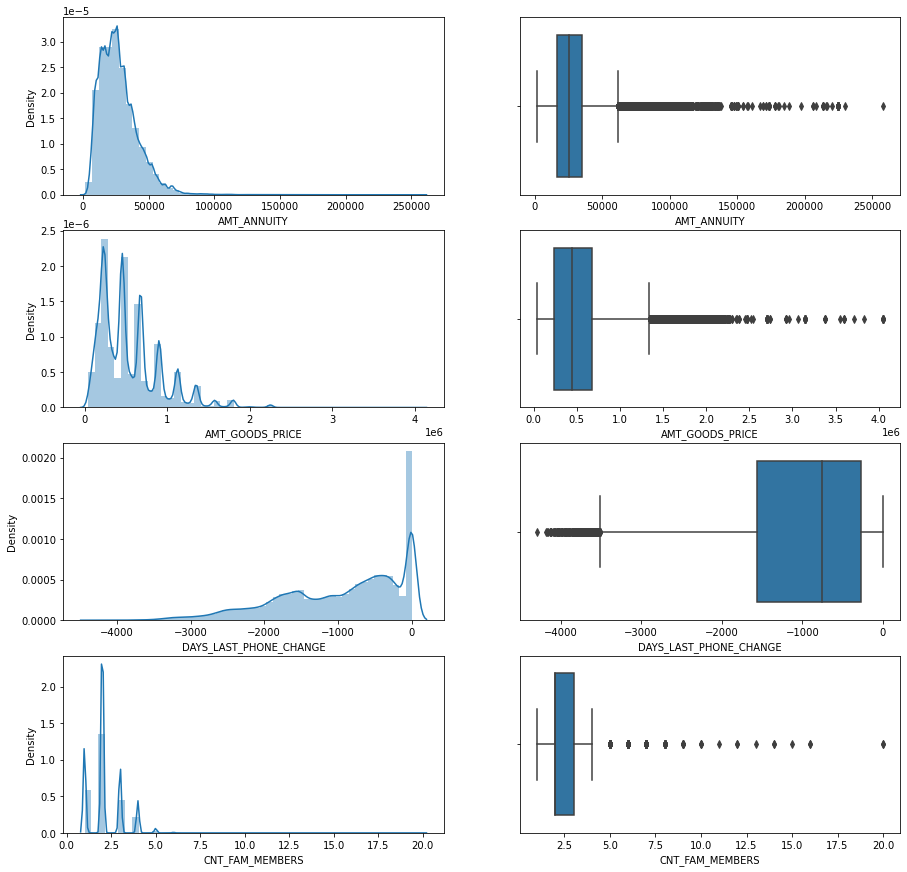

In [20]:
plt.figure(figsize=[15,15])
plt.subplot(4,2,1)
sns.distplot(df.AMT_ANNUITY, bins=50)
plt.subplot(4,2,2)
sns.boxplot(df.AMT_ANNUITY)
plt.subplot(4,2,3)
sns.distplot(df.AMT_GOODS_PRICE, bins=50)
plt.subplot(4,2,4)
sns.boxplot(df.AMT_GOODS_PRICE)
plt.subplot(4,2,5)
sns.distplot(df.DAYS_LAST_PHONE_CHANGE, bins=50)
plt.subplot(4,2,6)
sns.boxplot(df.DAYS_LAST_PHONE_CHANGE)
plt.subplot(4,2,7)
sns.distplot(df.CNT_FAM_MEMBERS, bins=50)
plt.subplot(4,2,8)
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

<p>As data is highly skewed lets use Median values for null value imputation.</p>

In [21]:
df['AMT_ANNUITY'].fillna(value=round(df.AMT_ANNUITY.median(),1), inplace=True)
df['AMT_GOODS_PRICE'].fillna(value=round(df.AMT_GOODS_PRICE.median(),1), inplace=True)
df['DAYS_LAST_PHONE_CHANGE'].fillna(value=df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)
df['CNT_FAM_MEMBERS'].fillna(value=df.CNT_FAM_MEMBERS.median(), inplace=True)

For categorical columns penidng, lets use mode function for imputation.Occupation Type is a very usefull column for our analysis. So we are not dropping it even though it had 30 percent null values. We are imputing null values of Occupation Type according to the education they have.

In [22]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
df['NAME_TYPE_SUITE'].fillna(value=df.NAME_TYPE_SUITE.mode()[0], inplace=True)
df['CODE_GENDER'].fillna(value=df.CODE_GENDER.mode()[0], inplace=True)
df['ORGANIZATION_TYPE'].fillna(value=df.ORGANIZATION_TYPE.mode()[0], inplace=True)
l5=list(df.NAME_EDUCATION_TYPE.unique())
for i in l5:
    df.loc[(df['NAME_EDUCATION_TYPE']==i) & (df['OCCUPATION_TYPE'].isnull()),'OCCUPATION_TYPE']=(df[df.NAME_EDUCATION_TYPE==i].OCCUPATION_TYPE.mode()[0])

In [24]:
for i in l5:
    print('For Education type '+i+' Occupation Type Null Value Imputed by '+(df[df.NAME_EDUCATION_TYPE==i].OCCUPATION_TYPE.mode()[0]))

For Education type Secondary / secondary special Occupation Type Null Value Imputed by Laborers
For Education type Higher education Occupation Type Null Value Imputed by Core staff
For Education type Incomplete higher Occupation Type Null Value Imputed by Laborers
For Education type Lower secondary Occupation Type Null Value Imputed by Laborers
For Education type Academic degree Occupation Type Null Value Imputed by Managers


In [25]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 130794
Core staff                48296
Sales staff               32102
Managers                  21428
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
df.isnull().sum()/df.shape[0]*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
ORGANIZATION_TYPE              0.0
OBS_30_CNT_SOCIAL_CI

#### Changing unnecessary Float data type to Integer

In [27]:
l4=['DAYS_REGISTRATION','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for i in l4:
    df[i]=df[i].astype(dtype='int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [28]:
df['TARGET']=df['TARGET'].astype(dtype='int64')

### Outlier Treatment

In [29]:
l6=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_CHILDREN','AMT_INCOME_TOTAL',
    'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']
df[l6].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120327     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.487841   
std         0.722121      2.371231e+05  4.024908e+05   14493.461065   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  CNT_FAM_MEMBERS  
count     3.075110e+05    307511.000000  
mean      5.383163e+05         2.152664  
std       3.692890e+05         0.910679  
min       4.050000e+04         1.000000  
25%       2.385000e+05         2.000000  
50%       4.500000e+05         2.000000  
75%       6.795000e+05         3.000000  
max       4.050000e+06        20.000000

Observing impossible outlier value in DAYS_EMPLOYED and also positive values not allowed as per column desription. We are not getting clear picture using just statistical figures for rest. Lets make use of Box plots

#### 55368 records with exact same value('365243') in Days_Employed
Assuming it represents people with no Job, Lets replace it with zero

In [30]:
df[df.DAYS_EMPLOYED>0].DAYS_EMPLOYED.value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

In [31]:
df.loc[df['DAYS_EMPLOYED']>0,'DAYS_EMPLOYED']=0
df[df.DAYS_EMPLOYED>0].DAYS_EMPLOYED.value_counts()

Series([], Name: DAYS_EMPLOYED, dtype: int64)

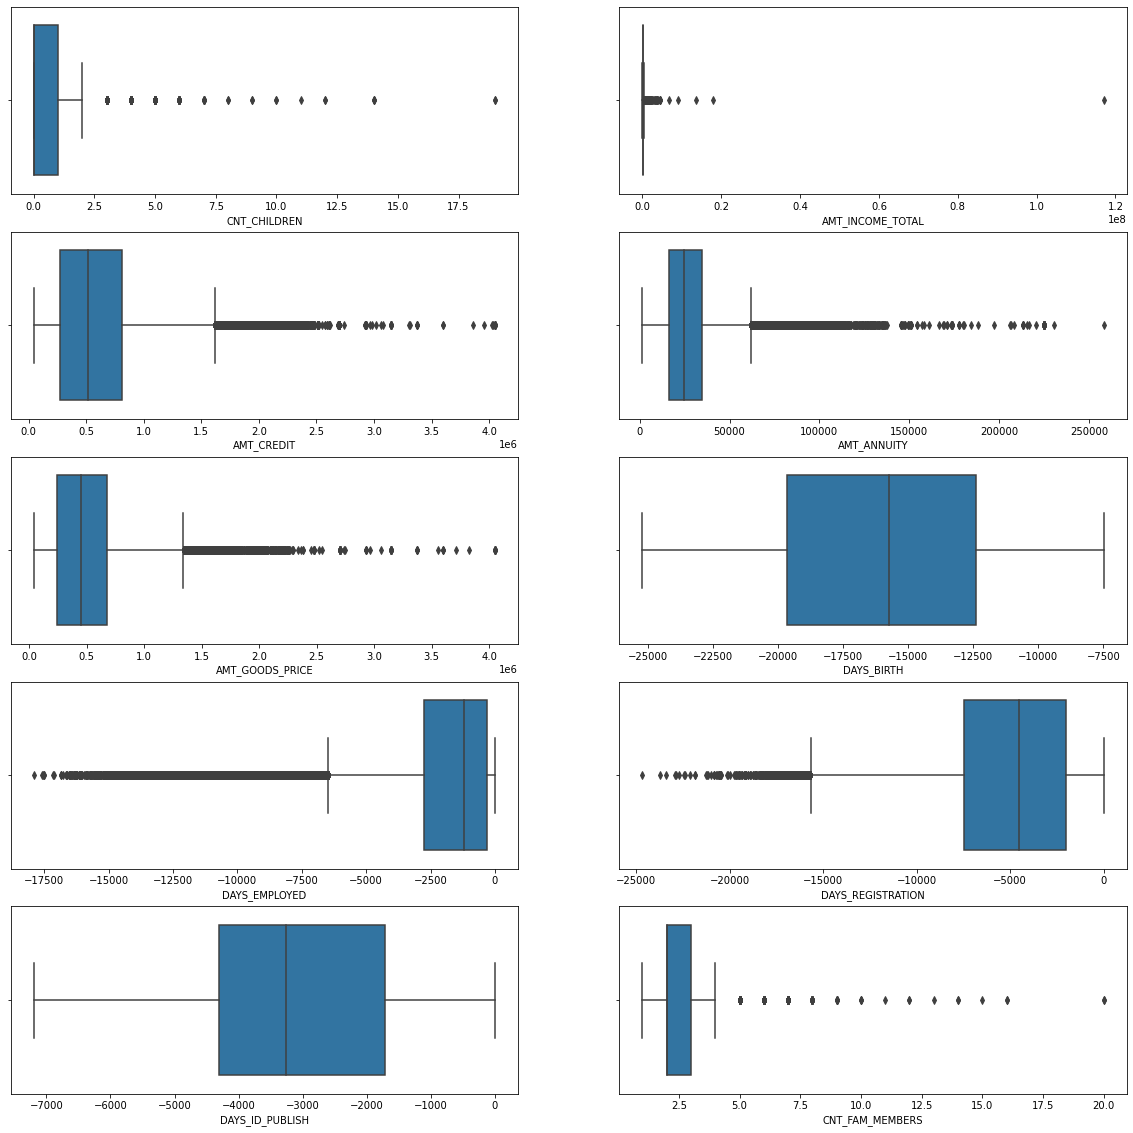

In [32]:
plt.figure(figsize=[20,20])
plt.subplot(5,2,1)
sns.boxplot(df.CNT_CHILDREN)
plt.subplot(5,2,2)
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.subplot(5,2,3)
sns.boxplot(df.AMT_CREDIT)
plt.subplot(5,2,4)
sns.boxplot(df.AMT_ANNUITY)
plt.subplot(5,2,5)
sns.boxplot(df.AMT_GOODS_PRICE)
plt.subplot(5,2,6)
sns.boxplot(df.DAYS_BIRTH)
plt.subplot(5,2,7)
sns.boxplot(df.DAYS_EMPLOYED)
plt.subplot(5,2,8)
sns.boxplot(df.DAYS_REGISTRATION)
plt.subplot(5,2,9)
sns.boxplot(df.DAYS_ID_PUBLISH)
plt.subplot(5,2,10)
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

<p>Dropping rows with CNT_CHILDREN > 5 considering them as outliers<br>
Dropping rows with AMT_INCOME_TOTAL > 15 Lakhs considering them as outliers<br>
Dropping rows with AMT_CREDIT > 15 Lakhs considering them as outliers<br>
Dropping rows with AMT_ANNUITY > 15 Lakhs considering them as outliers<br>
Dropping rows with AMT_GOODS_PRICE > 20 lakhs considering them as outliers<br>
Dropping rows with CNT_FAM_MEMBERS > 7 considering them as outliers</p>

In [33]:
df=df[df.CNT_CHILDREN<=5]
df=df[df.AMT_INCOME_TOTAL<=1500000]
df=df[df.AMT_CREDIT<=1500000]
df=df[df.AMT_ANNUITY<=1500000]
df=df[df.AMT_GOODS_PRICE<=2000000]
df=df[df.CNT_FAM_MEMBERS<=7]

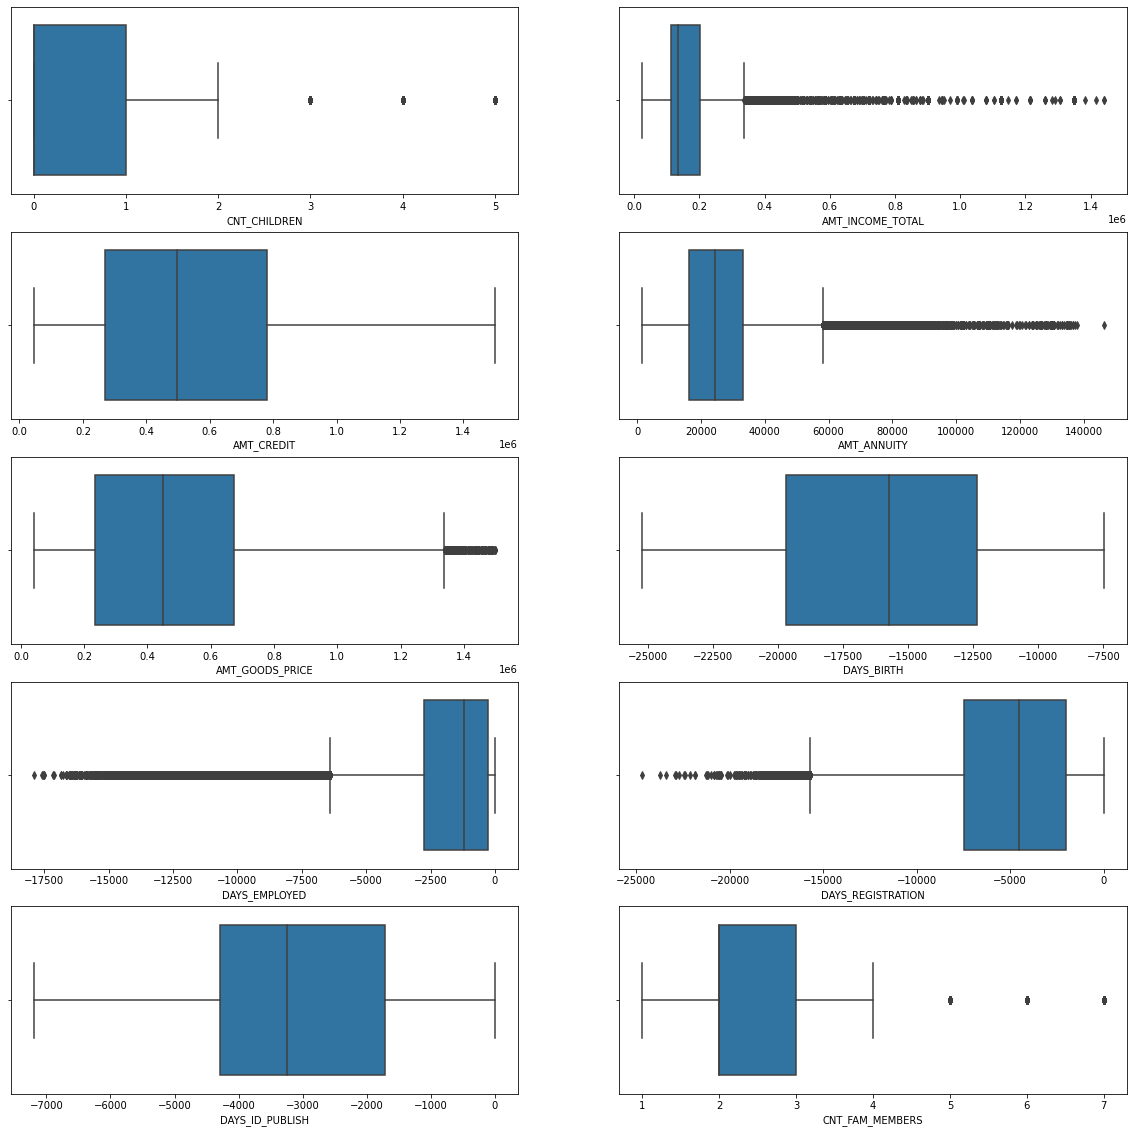

In [34]:
plt.figure(figsize=[20,20])
plt.subplot(5,2,1)
sns.boxplot(df.CNT_CHILDREN)
plt.subplot(5,2,2)
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.subplot(5,2,3)
sns.boxplot(df.AMT_CREDIT)
plt.subplot(5,2,4)
sns.boxplot(df.AMT_ANNUITY)
plt.subplot(5,2,5)
sns.boxplot(df.AMT_GOODS_PRICE)
plt.subplot(5,2,6)
sns.boxplot(df.DAYS_BIRTH)
plt.subplot(5,2,7)
sns.boxplot(df.DAYS_EMPLOYED)
plt.subplot(5,2,8)
sns.boxplot(df.DAYS_REGISTRATION)
plt.subplot(5,2,9)
sns.boxplot(df.DAYS_ID_PUBLISH)
plt.subplot(5,2,10)
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

Comparitevly Better Results received. Now lets convert certain columns into more industrial standard form for better use<br>
<br>
DAYS_BIRTH ---> AGE_GROUP (REPRESENTS AGE GROUP OF CUSTOMER)<br>
DAYS_EMPLOYED ---> JOB_EXP (TOTAL JOB EXPERIENCE CATEGORY)<br>
DAYS_REGISTRATION ---> YEARS_REGISTRATION (FROM DAYS TO YEARS FOR BETTER ANALYZING)<br>
DAYS_ID_PUBLISH ---> YEARS_ID_PUBLISH (FROM DAYS TO YEARS FOR BETTER ANALYZING)<br>
<br>
Assumption:- A year has 365 days. Leap Year condition not considering, as it is not making a big impact<br>
<br>
TOTAL_CREDIT_BUREAU_CNT ---> AFTER SUMMING <br>
AMT_REQ_CREDIT_BUREAU_HOUR<br>
AMT_REQ_CREDIT_BUREAU_DAY<br>
AMT_REQ_CREDIT_BUREAU_WEEK<br>
AMT_REQ_CREDIT_BUREAU_MON<br>
AMT_REQ_CREDIT_BUREAU_QRT<br>
AMT_REQ_CREDIT_BUREAU_YEAR<br>
<br>
WE JUST REQUIRE A TOTAL SUM, NOT REQUIRING YEARLY,MONTHLY, WEEKLY ETC...<br>
<br>
AFTER THESE ACTIVITIES WE CAN DROP PARENT COLUMNS, WHICH HELPS TO KEEP DATA SIMPLE AND SHORT

In [35]:
def age_group(x):
    x=round(abs(x)/365)
    if x < 18:
        return 'Less than 18'
    elif x >=18 and x <=30:
        return '18 to 30'
    elif x>=31 and x<=40:
        return '31 to 40'
    elif x>=41 and x<=50:
        return '41 to 50'
    elif x>=51 and x<=60:
        return '51 to 60'
    else:
        return 'Greater than 60'

df['AGE_GROUP']=df.DAYS_BIRTH.apply(lambda x:age_group(x))

In [36]:
df[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH AGE_GROUP
0       -9461  18 to 30
1      -16765  41 to 50
2      -19046  51 to 60
3      -19005  51 to 60
4      -19932  51 to 60

In [37]:
def job_exp(x):
    if x == 0:
        return 'Unemployed'
    else:
        x=round(abs(x)/365)
        if x <= 5:
            return 'Up to 5'
        elif x >=6 and x <=10:
            return '6 to 10'
        elif x>=11 and x<=20:
            return '11 to 20'
        elif x>=21 and x<=30:
            return '21 to 30'
        elif x>=31 and x<=40:
            return '31 to 40'
        else:
            return 'Greater than 40'
        
df['JOB_EXP']=df.DAYS_EMPLOYED.apply(lambda x:job_exp(x))

In [38]:
df[['DAYS_EMPLOYED','JOB_EXP']].head()

DAYS_EMPLOYED  JOB_EXP
0           -637  Up to 5
1          -1188  Up to 5
2           -225  Up to 5
3          -3039  6 to 10
4          -3038  6 to 10

In [39]:
def days_year(x):
    if x == 0:
        return 0
    else:
        x=round(abs(x)/365)
        return x

In [40]:
df['YEARS_REGISTRATION']=df.DAYS_REGISTRATION.apply(lambda x:days_year(x))
df[['DAYS_REGISTRATION','YEARS_REGISTRATION']].head()

DAYS_REGISTRATION  YEARS_REGISTRATION
0              -3648                  10
1              -1186                   3
2              -4260                  12
3              -9833                  27
4              -4311                  12

In [41]:
df['YEARS_ID_PUBLISH']=df.DAYS_ID_PUBLISH.apply(lambda x:days_year(x))
df[['DAYS_ID_PUBLISH','YEARS_ID_PUBLISH']].head()

DAYS_ID_PUBLISH  YEARS_ID_PUBLISH
0            -2120                 6
1             -291                 1
2            -2531                 7
3            -2437                 7
4            -3458                 9

In [42]:
df['TOTAL_CREDIT_BUREAU_CNT']=df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)

In [43]:
df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TOTAL_CREDIT_BUREAU_CNT']].head(15)

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
5                            0                          0   
8                            0                          0   
9                            0                          0   
10                           0                          0   
11                           0                          0   
12                           0                          0   
13                           0                          0   
14                           0                          0   
15                           0                          0   
16                           0                          0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
5                            0                          0   
8                            0                          0   
9                            0                          0   
10                           0                          1   
11                           0                          0   
12                           0                          1   
13                           0                          0   
14                           0                          0   
15                           0                          0   
16                           0                          0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                           0                           1   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           1                           1   
8                           0                           1   
9                           0                           0   
10                          0                           0   
11                          0                           2   
12                          0                           0   
13                          0                           1   
14                          0                           0   
15                          0                           1   
16                          1                           0   

    TOTAL_CREDIT_BUREAU_CNT  
0                         1  
1                         0  
2                         0  
3                         0  
4                         0  
5                         2  
8                         1  
9                         0  
10                        1  
11                        2  
12                        1  
13                        1  
14                        0  
15                        1  
16                        1

#### Now Lets Drop parent columns

In [44]:
l7=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
df.drop(l7,axis=1,inplace=True)
df.shape

(296646, 34)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296646 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   296646 non-null  int64  
 1   TARGET                       296646 non-null  int64  
 2   NAME_CONTRACT_TYPE           296646 non-null  object 
 3   CODE_GENDER                  296646 non-null  object 
 4   FLAG_OWN_CAR                 296646 non-null  object 
 5   FLAG_OWN_REALTY              296646 non-null  object 
 6   CNT_CHILDREN                 296646 non-null  int64  
 7   AMT_INCOME_TOTAL             296646 non-null  float64
 8   AMT_CREDIT                   296646 non-null  float64
 9   AMT_ANNUITY                  296646 non-null  float64
 10  AMT_GOODS_PRICE              296646 non-null  float64
 11  NAME_TYPE_SUITE              296646 non-null  object 
 12  NAME_INCOME_TYPE             296646 non-null  object 
 13 

### Univariate Analysis

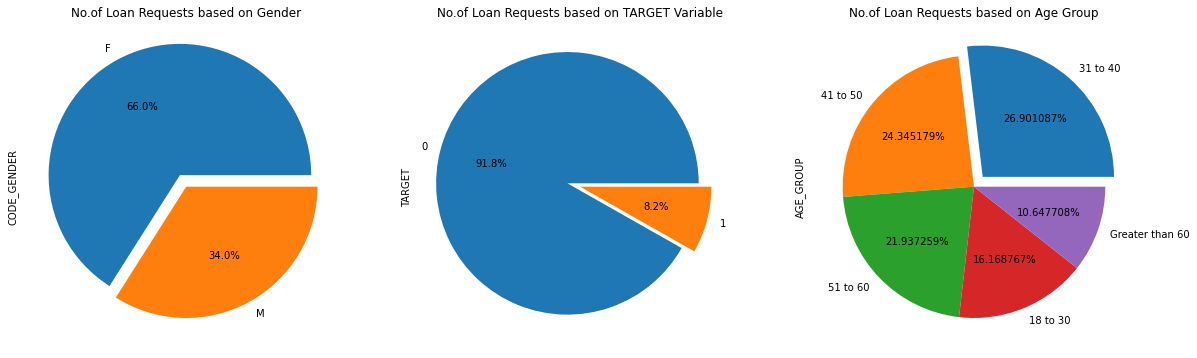

In [46]:
plt.figure(figsize=[20,20])
plt.subplot(1,3,1)
Explode=list(np.zeros(df['CODE_GENDER'].value_counts().shape[0]))
Explode[0]=0.1
df['CODE_GENDER'].value_counts().plot.pie(explode=Explode,autopct='%1.1f%%')
plt.title("No.of Loan Requests based on Gender", fontsize=12)
plt.subplot(1,3,2)
Explode=list(np.zeros(df['TARGET'].value_counts().shape[0]))
Explode[0]=0.1
df['TARGET'].value_counts().plot.pie(explode=Explode,autopct='%1.1f%%')
plt.title("No.of Loan Requests based on TARGET Variable", fontsize=12)
plt.subplot(1,3,3)
Explode=list(np.zeros(df['AGE_GROUP'].value_counts().shape[0]))
Explode[0]=0.1
df['AGE_GROUP'].value_counts().plot.pie(explode=Explode,autopct='%1f%%')
plt.title("No.of Loan Requests based on Age Group", fontsize=12)
plt.show()

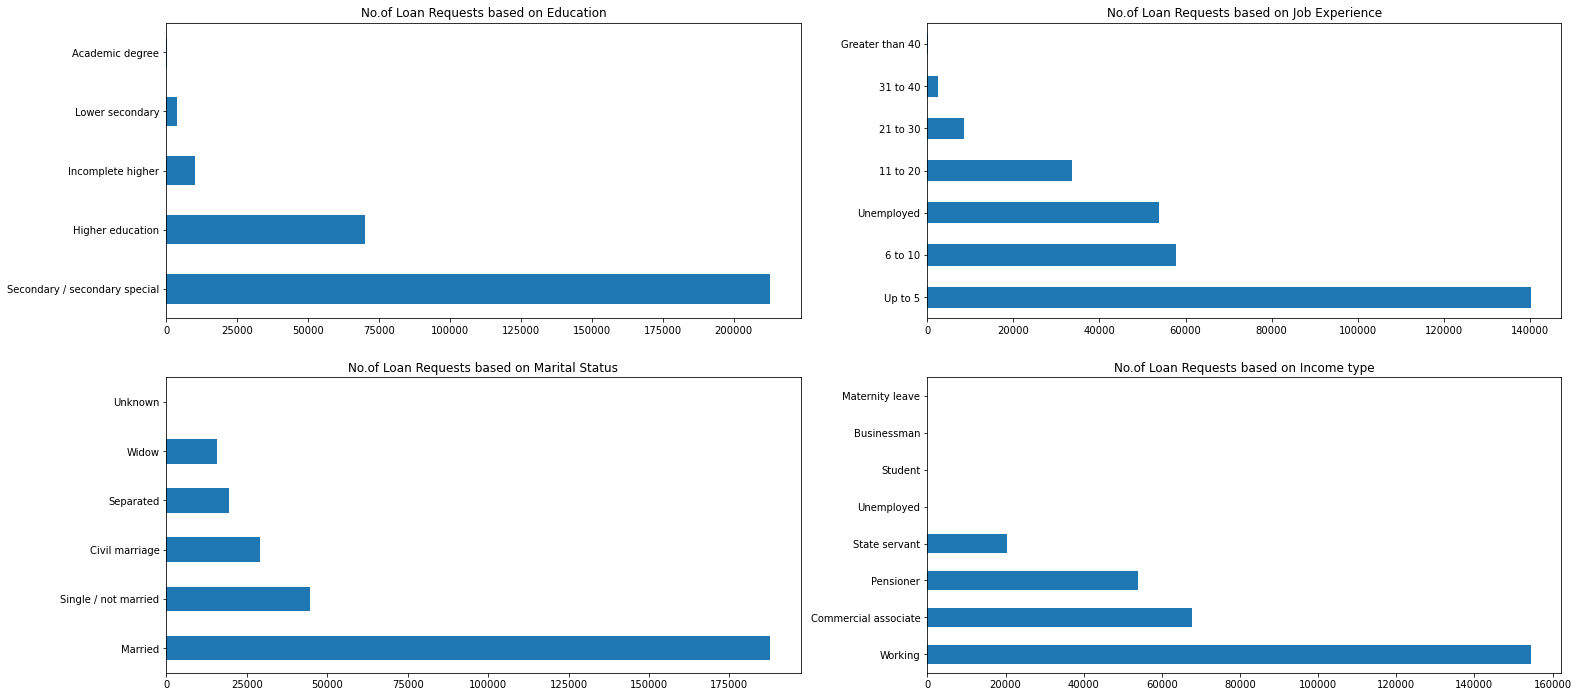

In [47]:
plt.figure(figsize=[25,25])
plt.subplot(4,2,1)
df['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.title("No.of Loan Requests based on Education", fontsize=12)
plt.subplot(4,2,2)
df['JOB_EXP'].value_counts().plot.barh()
plt.title("No.of Loan Requests based on Job Experience", fontsize=12)
plt.subplot(4,2,3)
df['NAME_FAMILY_STATUS'].value_counts().plot.barh()
plt.title("No.of Loan Requests based on Marital Status", fontsize=12)
plt.subplot(4,2,4)
df['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.title("No.of Loan Requests based on Income type", fontsize=12)
plt.show()

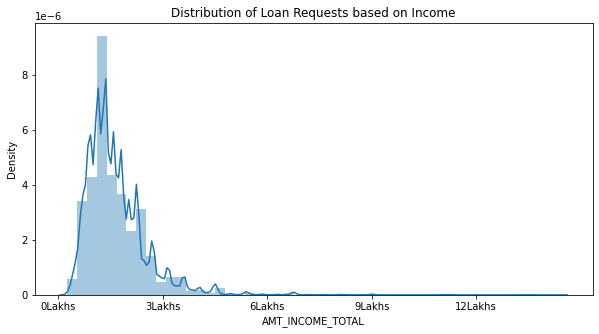

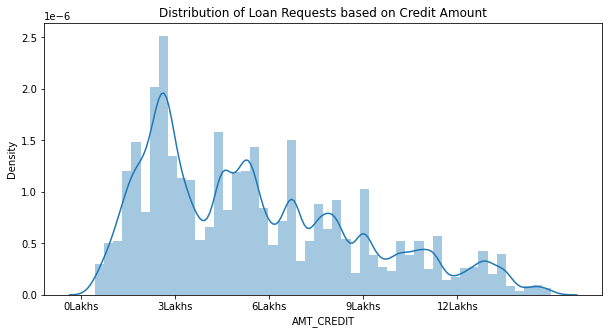

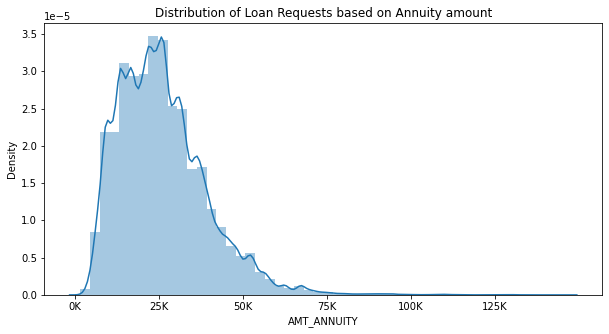

In [48]:
plt.figure(figsize=[10,5])
ticks = np.arange(0, 1500000, 300000)
labels = ["{}Lakhs".format(i//100000) for i in ticks]
sns.distplot(df.AMT_INCOME_TOTAL, bins=50)
plt.xticks(ticks, labels)
plt.title("Distribution of Loan Requests based on Income", fontsize=12)
ticks = np.arange(0, 1500000, 300000)
labels = ["{}Lakhs".format(i//100000) for i in ticks]
plt.show()
plt.figure(figsize=[10,5])
sns.distplot(df.AMT_CREDIT, bins=50)
plt.xticks(ticks, labels)
plt.title("Distribution of Loan Requests based on Credit Amount", fontsize=12)
plt.show()
ticks = np.arange(0, 150000, 25000)
labels = ["{}K".format(round(i/1000)) for i in ticks]
plt.figure(figsize=[10,5])
sns.distplot(df.AMT_ANNUITY, bins=50)
plt.xticks(ticks, labels)
plt.title("Distribution of Loan Requests based on Annuity amount", fontsize=12)
plt.show()

### Bi Variate Analysis

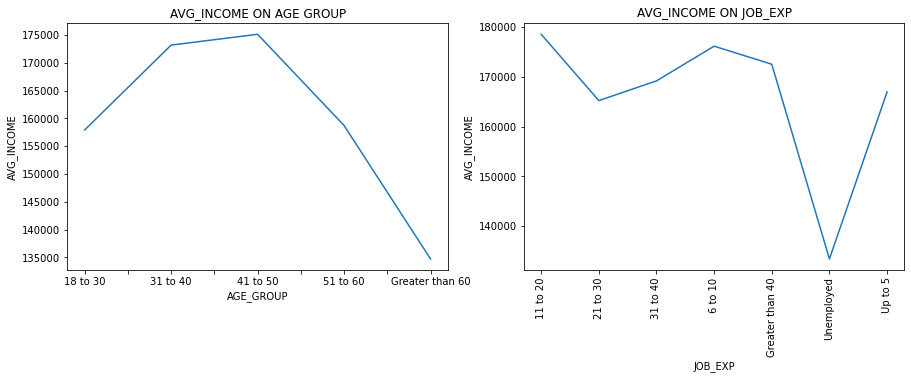

In [49]:
## Plot a line graph
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
df.groupby(['AGE_GROUP'])['AMT_INCOME_TOTAL'].mean().plot()
plt.title("AVG_INCOME ON AGE GROUP", fontsize=12)
plt.ylabel('AVG_INCOME')
plt.subplot(2,2,2)
df.groupby(['JOB_EXP'])['AMT_INCOME_TOTAL'].mean().plot()
plt.title("AVG_INCOME ON JOB_EXP", fontsize=12)
plt.ylabel('AVG_INCOME')
plt.xticks(rotation=90)
plt.show()

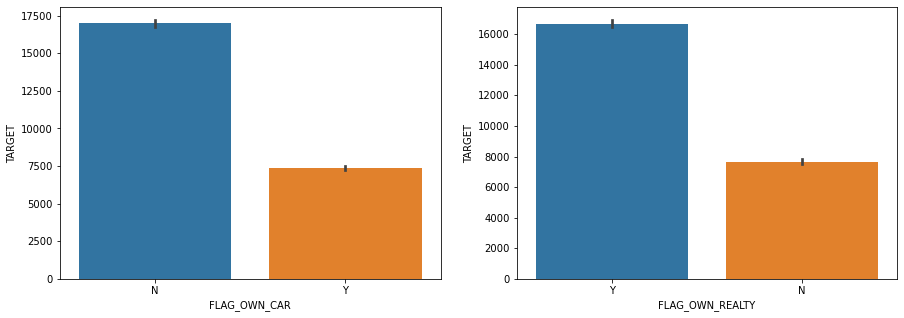

In [50]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.barplot(data=df, x="FLAG_OWN_CAR", y="TARGET", estimator=np.sum)
plt.subplot(1,2,2)
sns.barplot(data=df, x="FLAG_OWN_REALTY", y="TARGET", estimator=np.sum)
plt.show()

### Multi Variate Analysis

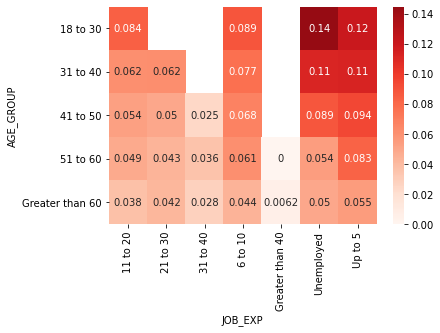

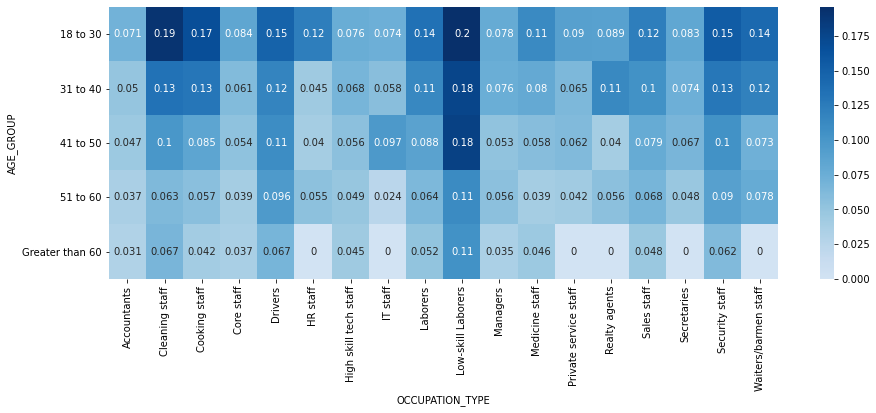

In [51]:
res=pd.pivot_table(data=df, index="AGE_GROUP", columns="JOB_EXP", values="TARGET")
sns.heatmap(res, annot= True,cmap='Reds',center= 0.08)
plt.yticks(rotation=0)
plt.show()
plt.figure(figsize=[15,5])
res=pd.pivot_table(data=df, index="AGE_GROUP", columns="OCCUPATION_TYPE", values="TARGET")
sns.heatmap(res, annot= True,cmap='Blues',center= 0.075)
plt.yticks(rotation=0)
plt.show()

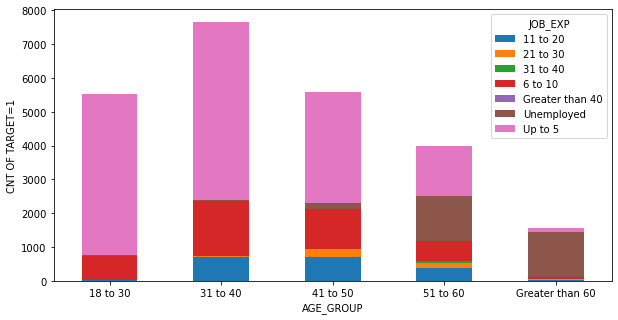

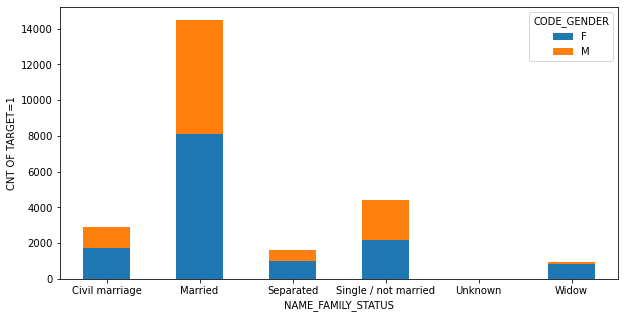

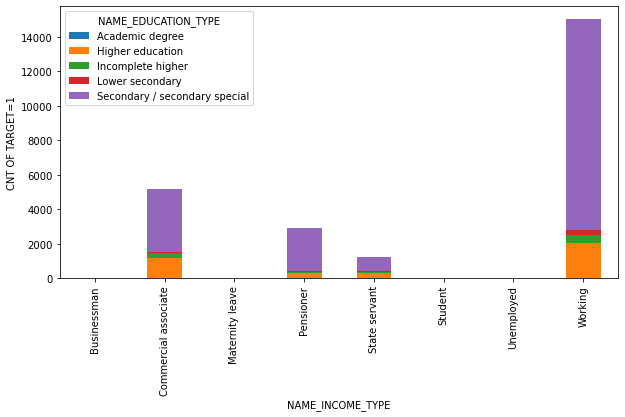

In [52]:
multi = pd.pivot_table(data=df, values="TARGET", index="AGE_GROUP", columns="JOB_EXP", aggfunc=sum)
multi.plot(kind="bar", stacked="True", figsize=[10,5])
plt.xticks(rotation=0)
plt.ylabel('CNT OF TARGET=1')
plt.show()

multi = pd.pivot_table(data=df, values="TARGET", index="NAME_FAMILY_STATUS", columns="CODE_GENDER", aggfunc=sum)
multi.plot(kind="bar", stacked="True", figsize=[10,5])
plt.xticks(rotation=0)
plt.ylabel('CNT OF TARGET=1')
plt.show()

multi = pd.pivot_table(data=df, values="TARGET", index="NAME_INCOME_TYPE", columns="NAME_EDUCATION_TYPE", aggfunc=sum)
multi.plot(kind="bar", stacked="True", figsize=[10,5])
plt.xticks(rotation=90)
plt.ylabel('CNT OF TARGET=1')
plt.show()

## previous_application.csv

In [53]:
df1=pd.read_csv('previous_application.csv')
print(df1.shape)
df1.head(10)

(1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

Observing the data frame we can assume value 'XAP' and 'XNA' represents null values, as it appearing across multiple columns. Lets reset it to null.

In [54]:
df1.replace(to_replace=['XAP','XNA'],value=np.nan,inplace=True)
df1.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    NaN             Approved   
1                       NaN                    NaN             Approved   
2                       NaN                    NaN             Approved   
3                       NaN                    NaN             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    NaN             Canceled   
7                       NaN                    NaN             Canceled   
8                       NaN                    NaN             Canceled   
9                       NaN                    NaN             Canceled   

   DAYS_DECISION      NAME_

In [55]:
df1.isnull().sum()/len(df1)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE         95.830774
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              37.563091
CODE_REJECT_REASON             81.327123
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.116213
NAME_GOODS_CATEGORY            56.927376
NAME_PORTFOLIO                 22.286366
NAME_PRODUCT_TYP

In [56]:
# Creating a Data frame with missing value data percent per column > 40
x=pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100>40,columns=['Status'])
x['Missing_Value_percent']=df1.isnull().sum()/df1.shape[0]*100
x[x.Status==True].head(20)

Status  Missing_Value_percent
AMT_DOWN_PAYMENT             True              53.636480
RATE_DOWN_PAYMENT            True              53.636480
RATE_INTEREST_PRIMARY        True              99.643698
RATE_INTEREST_PRIVILEGED     True              99.643698
NAME_CASH_LOAN_PURPOSE       True              95.830774
CODE_REJECT_REASON           True              81.327123
NAME_TYPE_SUITE              True              49.119754
NAME_GOODS_CATEGORY          True              56.927376
NAME_PRODUCT_TYPE            True              63.684414
NAME_SELLER_INDUSTRY         True              51.234153
DAYS_FIRST_DRAWING           True              40.298129
DAYS_FIRST_DUE               True              40.298129
DAYS_LAST_DUE_1ST_VERSION    True              40.298129
DAYS_LAST_DUE                True              40.298129
DAYS_TERMINATION             True              40.298129
NFLAG_INSURED_ON_APPROVAL    True              40.298129

In [57]:
l1=list(x[x.Status==True].index)
print(l1,'\n\n','Number of column to be dropped due to 40% or above null values = '+str(len(l1)))

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'] 

 Number of column to be dropped due to 40% or above null values = 16


In [58]:
df0=pd.DataFrame(columns=['Row','Description'])
for x in df2.Row:
    if x in l1:
        df0=df0.append((df2[df2.Row==x].iloc[:,2:4]),ignore_index = True)
df0

Row  \
0             NAME_TYPE_SUITE   
1             NAME_TYPE_SUITE   
2            AMT_DOWN_PAYMENT   
3           RATE_DOWN_PAYMENT   
4       RATE_INTEREST_PRIMARY   
5    RATE_INTEREST_PRIVILEGED   
6      NAME_CASH_LOAN_PURPOSE   
7          CODE_REJECT_REASON   
8             NAME_TYPE_SUITE   
9             NAME_TYPE_SUITE   
10        NAME_GOODS_CATEGORY   
11          NAME_PRODUCT_TYPE   
12       NAME_SELLER_INDUSTRY   
13         DAYS_FIRST_DRAWING   
14             DAYS_FIRST_DUE   
15  DAYS_LAST_DUE_1ST_VERSION   
16              DAYS_LAST_DUE   
17           DAYS_TERMINATION   
18  NFLAG_INSURED_ON_APPROVAL   

                                          Description  
0   Who was accompanying client when he was applyi...  
1   Who accompanied client when applying for the p...  
2            Down payment on the previous application  
3     Down payment rate normalized on previous credit  
4         Interest rate normalized on previous credit  
5         Interest rate normalized on previous credit  
6                            Purpose of the cash loan  
7           Why was the previous application rejected  
8   Who was accompanying client when he was applyi...  
9   Who accompanied client when applying for the p...  
10  What kind of goods did the client apply for in...  
11      Was the previous application x-sell o walk-in  
12                         The industry of the seller  
13  Relative to application date of current applic...  
14  Relative to application date of current applic...  
15  Relative to application date of current applic...  
16  Relative to application date of current applic...  
17  Relative to application date of current applic...  
18  Did the client requested insurance during the ...

When Checked columns description 'AMT_DOWN_PAYMENT' and 'RATE_DOWN_PAYMENT' represents down payment details, which is pretty relevant for analysis. Also Down payment is not mandatory now a days while purchasing goods. Hence it can be zero. we should impute null values with zero for these two columns

In [59]:
## Removing two columns from l1 manually
l1=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 
    'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 
    'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 
    'NFLAG_INSURED_ON_APPROVAL'] 
df1.drop(l1,axis=1,inplace=True)
df1.loc[df1['AMT_DOWN_PAYMENT'].isnull(),'AMT_DOWN_PAYMENT']=0
df1.loc[df1['RATE_DOWN_PAYMENT'].isnull(),'RATE_DOWN_PAYMENT']=0

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             1670214 non-null  float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            1670214 non-n

In [61]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               0.0         607500.0                   THURSDAY   
2    136444.5               0.0         112500.0                    TUESDAY   
3    470790.0               0.0         450000.0                     MONDAY   
4    404055.0               0.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT NAME_CONTRACT_STATUS  \
0                       1                0.0             Approved   
1                       1                0.0             Approved   
2                       1                0.0             Approved   
3                       1                0.0             Approved   
4                       1                0.0              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0            -73  Cash through the bank         Repeater            POS   
1           -164                    NaN         Repeater           Cash   
2           -301  Cash through the bank         Repeater           Cash   
3           -512  Cash through the bank         Repeater           Cash   
4           -781  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide                35         12.0           middle   
1           Contact center                -1         36.0       low_action   
2  Credit and cash offices                -1         12.0             high   
3  Credit and cash offices                -1         12.0           middle   
4  Credit and cash offices                -1         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

After checking data frame identified below column are irrelevant for analysis.

'WEEKDAY_APPR_PROCESS_START',
'HOUR_APPR_PROCESS_START',
'FLAG_LAST_APPL_PER_CONTRACT',
'NFLAG_LAST_APPL_IN_DAY',
'SELLERPLACE_AREA'

So dropping these columns

In [62]:
l2=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA']
df0=pd.DataFrame(columns=['Row','Description'])
for x in df2.Row:
    if x in l2:
        df0=df0.append((df2[(df2.Row==x) & (df2.Table=='previous_application.csv')].iloc[:,2:4]),ignore_index = True)
df0

Row  \
0   WEEKDAY_APPR_PROCESS_START   
1      HOUR_APPR_PROCESS_START   
2   WEEKDAY_APPR_PROCESS_START   
3      HOUR_APPR_PROCESS_START   
4  FLAG_LAST_APPL_PER_CONTRACT   
5       NFLAG_LAST_APPL_IN_DAY   
6             SELLERPLACE_AREA   

                                         Description  
0  On which day of the week did the client apply ...  
1  Approximately at what day hour did the client ...  
2  On which day of the week did the client apply ...  
3  Approximately at what day hour did the client ...  
4  Flag if it was last application for the previo...  
5  Flag if the application was the last applicati...  
6  Selling area of seller place of the previous a...

In [63]:
df1.drop(l2,axis=1,inplace=True)
df1.shape

(1670214, 18)

In [64]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  RATE_DOWN_PAYMENT  \
0     17145.0               0.0          17145.0                0.0   
1    679671.0               0.0         607500.0                0.0   
2    136444.5               0.0         112500.0                0.0   
3    470790.0               0.0         450000.0                0.0   
4    404055.0               0.0         337500.0                0.0   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE  \
0             Approved            -73  Cash through the bank         Repeater   
1             Approved           -164                    NaN         Repeater   
2             Approved           -301  Cash through the bank         Repeater   
3             Approved           -512  Cash through the bank         Repeater   
4              Refused           -781  Cash through the bank         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT NAME_YIELD_GROUP  \
0            POS             Country-wide         12.0           middle   
1           Cash           Contact center         36.0       low_action   
2           Cash  Credit and cash offices         12.0             high   
3           Cash  Credit and cash offices         12.0           middle   
4           Cash  Credit and cash offices         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [65]:
df1.isnull().sum()/len(df1)*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
NAME_CONTRACT_TYPE       0.020716
AMT_ANNUITY             22.286665
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000060
AMT_DOWN_PAYMENT         0.000000
AMT_GOODS_PRICE         23.081773
RATE_DOWN_PAYMENT        0.000000
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
NAME_PAYMENT_TYPE       37.563091
NAME_CLIENT_TYPE         0.116213
NAME_PORTFOLIO          22.286366
CHANNEL_TYPE             0.000000
CNT_PAYMENT             22.286366
NAME_YIELD_GROUP        30.966990
PRODUCT_COMBINATION      0.020716
dtype: float64

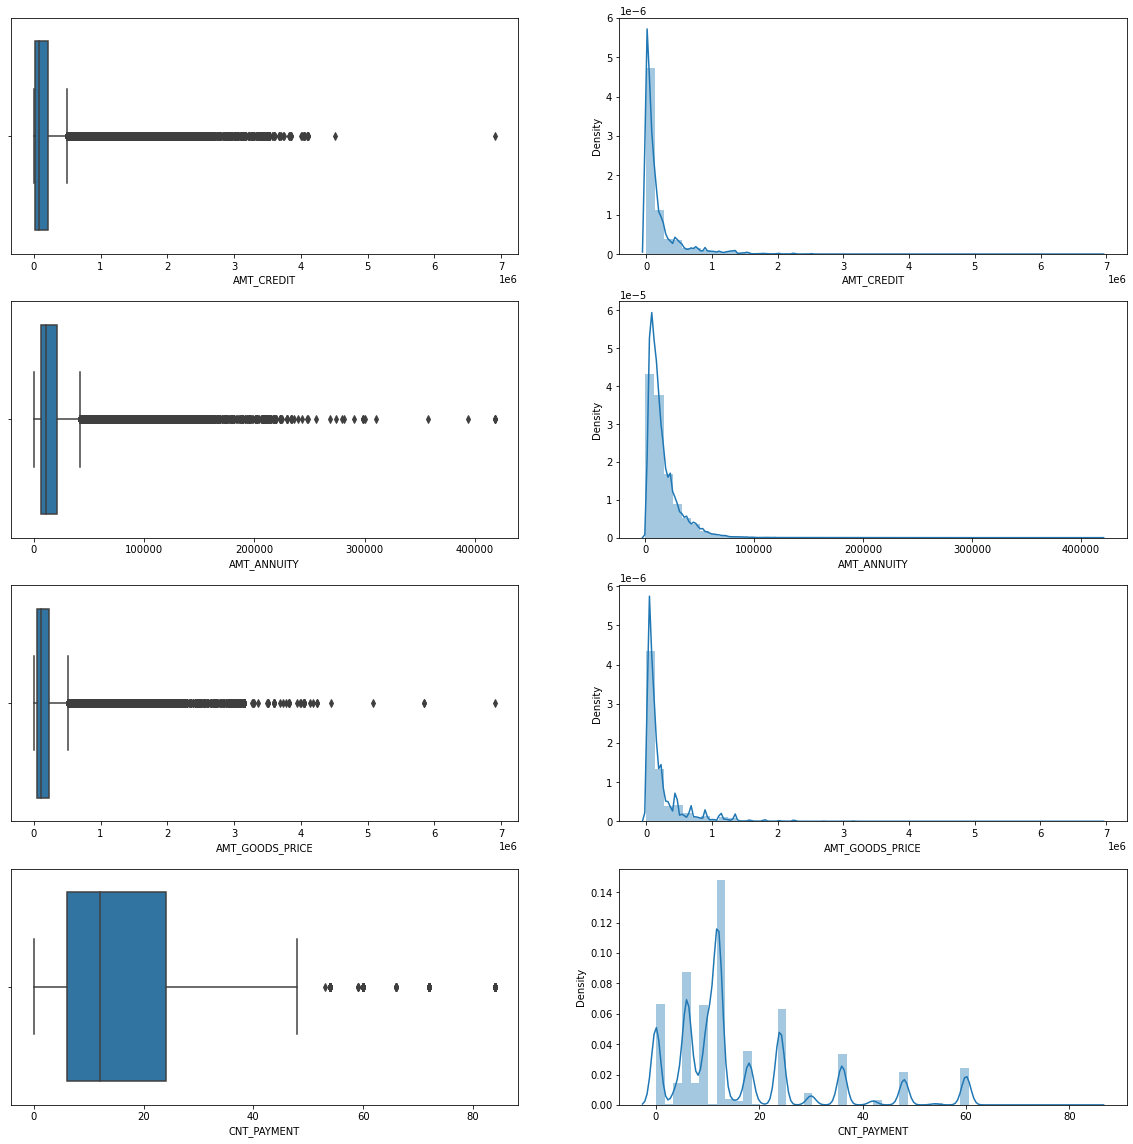

In [66]:
plt.figure(figsize=[20,20])
plt.subplot(4,2,1)
sns.boxplot(df1.AMT_CREDIT)
plt.subplot(4,2,2)
sns.distplot(df1.AMT_CREDIT, bins=50)
plt.subplot(4,2,3)
sns.boxplot(df1.AMT_ANNUITY)
plt.subplot(4,2,4)
sns.distplot(df1.AMT_ANNUITY, bins=50)
plt.subplot(4,2,5)
sns.boxplot(df1.AMT_GOODS_PRICE)
plt.subplot(4,2,6)
sns.distplot(df1.AMT_GOODS_PRICE, bins=50)
plt.subplot(4,2,7)
sns.boxplot(df1.CNT_PAYMENT)
plt.subplot(4,2,8)
sns.distplot(df1.CNT_PAYMENT, bins=50)
plt.show()

#### Since data is skewed null for numerical columns, null value imputation is done using median value. For categorical columns using Mode value.

In [67]:
df1['AMT_ANNUITY'].fillna(value=round(df1.AMT_ANNUITY.median(),1), inplace=True)
df1['AMT_GOODS_PRICE'].fillna(value=round(df1.AMT_GOODS_PRICE.median(),1), inplace=True)
df1['AMT_CREDIT'].fillna(value=df1.AMT_CREDIT.median(), inplace=True)
df1['CNT_PAYMENT'].fillna(value=df1.CNT_PAYMENT.median(), inplace=True)

In [68]:
df1['NAME_CONTRACT_TYPE'].fillna(value=df1.NAME_CONTRACT_TYPE.mode()[0], inplace=True)
df1['NAME_PAYMENT_TYPE'].fillna(value=df1.NAME_PAYMENT_TYPE.mode()[0], inplace=True)
df1['NAME_CLIENT_TYPE'].fillna(value=df1.NAME_CLIENT_TYPE.mode()[0], inplace=True)
df1['NAME_PORTFOLIO'].fillna(value=df1.NAME_PORTFOLIO.mode()[0], inplace=True)
df1['NAME_YIELD_GROUP'].fillna(value=df1.NAME_YIELD_GROUP.mode()[0], inplace=True)
df1['PRODUCT_COMBINATION'].fillna(value=df1.PRODUCT_COMBINATION.mode()[0], inplace=True)

In [69]:
df1.isnull().sum()/len(df1)*100

SK_ID_PREV              0.0
SK_ID_CURR              0.0
NAME_CONTRACT_TYPE      0.0
AMT_ANNUITY             0.0
AMT_APPLICATION         0.0
AMT_CREDIT              0.0
AMT_DOWN_PAYMENT        0.0
AMT_GOODS_PRICE         0.0
RATE_DOWN_PAYMENT       0.0
NAME_CONTRACT_STATUS    0.0
DAYS_DECISION           0.0
NAME_PAYMENT_TYPE       0.0
NAME_CLIENT_TYPE        0.0
NAME_PORTFOLIO          0.0
CHANNEL_TYPE            0.0
CNT_PAYMENT             0.0
NAME_YIELD_GROUP        0.0
PRODUCT_COMBINATION     0.0
dtype: float64

In [70]:
df1.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  RATE_DOWN_PAYMENT  \
count  1.670214e+06      1.670214e+06     1.670214e+06       1.670214e+06   
mean   1.961140e+05      3.105151e+03     2.011815e+05       3.692243e-02   
std    3.185745e+05      1.463187e+04     2.808629e+05       8.347022e-02   
min    0.000000e+00     -9.000000e-01     0.000000e+00      -1.497876e-05   
25%    2.416050e+04      0.000000e+00     6.750000e+04       0.000000e+00   
50%    8.054100e+04      0.000000e+00     1.123200e+05       0.000000e+00   
75%    2.164185e+05      0.000000e+00     1.804050e+05       0.000000e+00   
max    6.905160e+06      3.060045e+06     6.905160e+06       1.000000e+00   

       DAYS_DECISION   CNT_PAYMENT  
count   1.670214e+06  1.670214e+06  
mean   -8.806797e+02  1.515057e+01  
std     7.790997e+02  1.295220e+01  
min    -2.922000e+03  0.000000e+00  
25%    -1.300000e+03  1.000000e+01  
50%    -5.810000e+02  1.200000e+01  
75%    -2.800000e+02  1.600000e+01  
max    -1.000000e+00  8.400000e+01

### Checking for Outliers

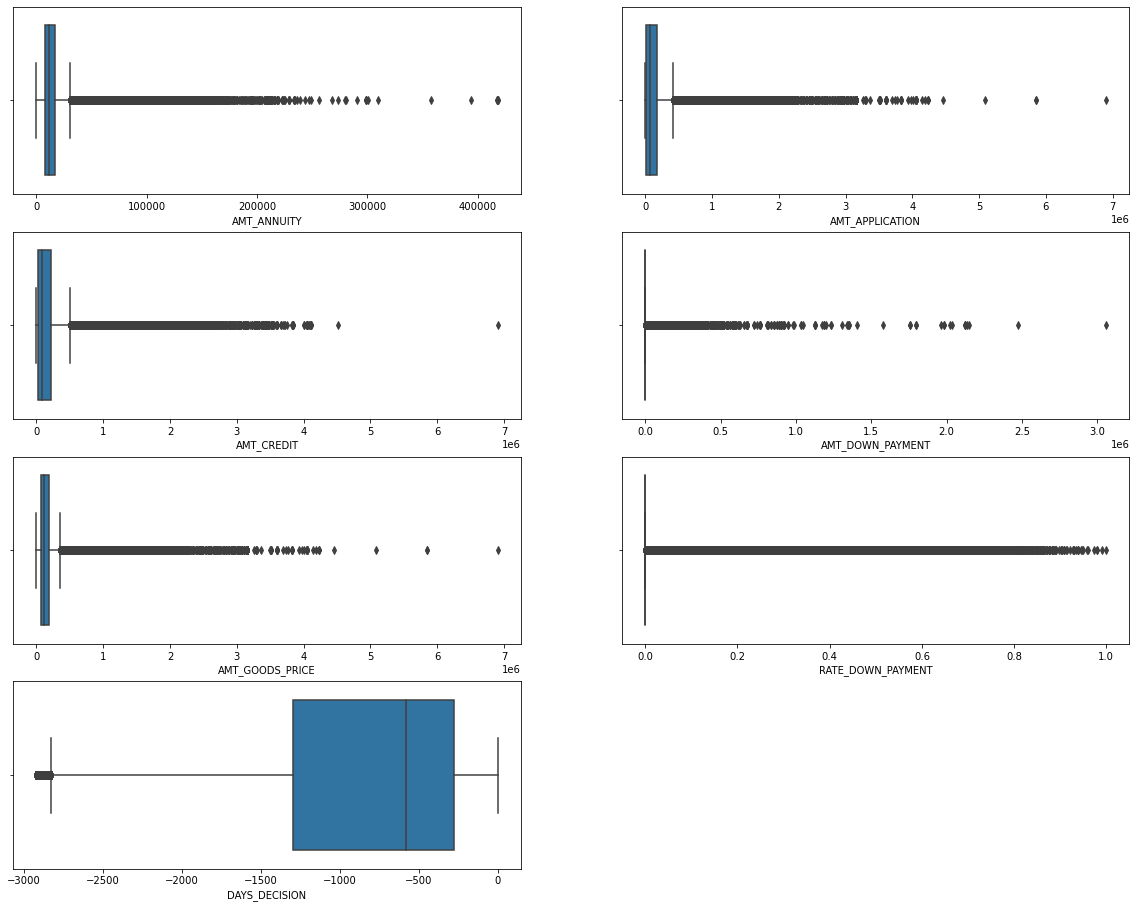

In [71]:
plt.figure(figsize=[20,20])
plt.subplot(5,2,1)
sns.boxplot(df1.AMT_ANNUITY)
plt.subplot(5,2,2)
sns.boxplot(df1.AMT_APPLICATION)
plt.subplot(5,2,3)
sns.boxplot(df1.AMT_CREDIT)
plt.subplot(5,2,4)
sns.boxplot(df1.AMT_DOWN_PAYMENT)
plt.subplot(5,2,5)
sns.boxplot(df1.AMT_GOODS_PRICE)
plt.subplot(5,2,6)
sns.boxplot(df1.RATE_DOWN_PAYMENT)
plt.subplot(5,2,7)
sns.boxplot(df1.DAYS_DECISION)
plt.show()

In [72]:
df1=df1[df1.AMT_APPLICATION<=4000000]
df1=df1[df1.AMT_CREDIT<=3500000]
df1=df1[df1.AMT_ANNUITY<=250000]
df1=df1[df1.AMT_GOODS_PRICE<=3000000]
df1=df1[df1.AMT_DOWN_PAYMENT<=1000000]

<p>Dropping rows with AMT_ANNUITY > 2.5 Lakhs considering them as outliers<br>
Dropping rows with AMT_APPLICATION > 40 Lakhs considering them as outliers<br>
Dropping rows with AMT_CREDIT > 35 Lakhs considering them as outliers<br>
Dropping rows with AMT_DOWN_PAYMENT > 10 Lakhs considering them as outliers<br>
Dropping rows with AMT_GOODS_PRICE > 30 lakhs considering them as outliers<br></p>

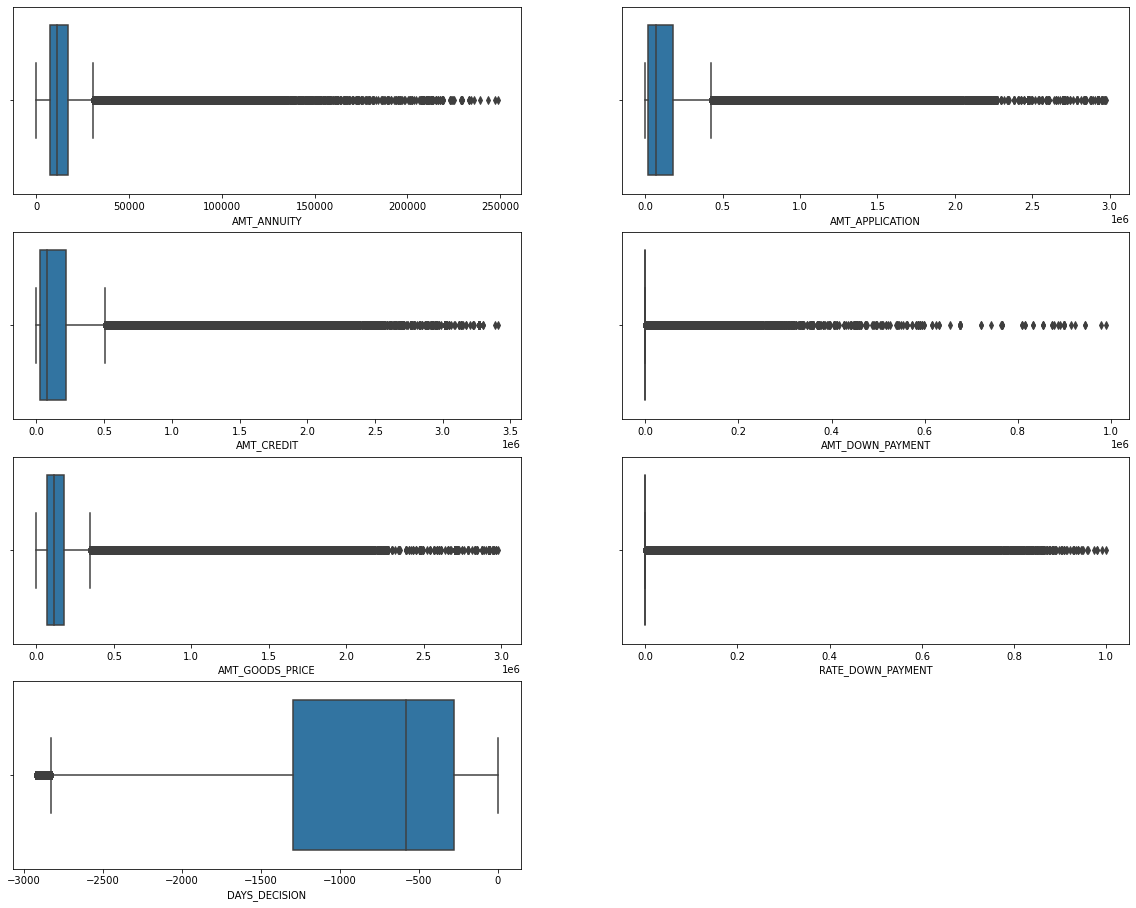

In [73]:
plt.figure(figsize=[20,20])
plt.subplot(5,2,1)
sns.boxplot(df1.AMT_ANNUITY)
plt.subplot(5,2,2)
sns.boxplot(df1.AMT_APPLICATION)
plt.subplot(5,2,3)
sns.boxplot(df1.AMT_CREDIT)
plt.subplot(5,2,4)
sns.boxplot(df1.AMT_DOWN_PAYMENT)
plt.subplot(5,2,5)
sns.boxplot(df1.AMT_GOODS_PRICE)
plt.subplot(5,2,6)
sns.boxplot(df1.RATE_DOWN_PAYMENT)
plt.subplot(5,2,7)
sns.boxplot(df1.DAYS_DECISION)
plt.show()

In [74]:
df1.shape

(1669694, 18)

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669694 entries, 0 to 1670213
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1669694 non-null  int64  
 1   SK_ID_CURR            1669694 non-null  int64  
 2   NAME_CONTRACT_TYPE    1669694 non-null  object 
 3   AMT_ANNUITY           1669694 non-null  float64
 4   AMT_APPLICATION       1669694 non-null  float64
 5   AMT_CREDIT            1669694 non-null  float64
 6   AMT_DOWN_PAYMENT      1669694 non-null  float64
 7   AMT_GOODS_PRICE       1669694 non-null  float64
 8   RATE_DOWN_PAYMENT     1669694 non-null  float64
 9   NAME_CONTRACT_STATUS  1669694 non-null  object 
 10  DAYS_DECISION         1669694 non-null  int64  
 11  NAME_PAYMENT_TYPE     1669694 non-null  object 
 12  NAME_CLIENT_TYPE      1669694 non-null  object 
 13  NAME_PORTFOLIO        1669694 non-null  object 
 14  CHANNEL_TYPE          1669694 non-

Changing data type of CNT_PAYMENT to int64 from float64

In [76]:
df1['CNT_PAYMENT']=df1['CNT_PAYMENT'].astype(dtype='int64')

In [77]:
def days_months(x):
    if x == 0:
        return 0
    else:
        x=round(abs(x)/30)
        return x

Converting DAYS_DECISION to MONTHS_DECISION (Approx time taken in months) for better analysis.

Assumption:- Every month has 30 days

Correcting PORTFOLIO column value from Cars to Cards

In [78]:
df1['MONTHS_DECISION']=df1['DAYS_DECISION'].apply(lambda x:days_months(x))
df1[['DAYS_DECISION','MONTHS_DECISION']].head()

DAYS_DECISION  MONTHS_DECISION
0            -73                2
1           -164                5
2           -301               10
3           -512               17
4           -781               26

In [79]:
df1['NAME_PORTFOLIO'].replace('Cars','Cards',inplace=True)

In [80]:
df1.drop('DAYS_DECISION',axis=1,inplace=True)

In [81]:
df1.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans    11250.000              0.0   
7     1656711      296299         Cash loans    11250.000              0.0   
8     2367563      342292         Cash loans    11250.000              0.0   
9     2579447      334349         Cash loans    11250.000              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  RATE_DOWN_PAYMENT  \
0     17145.0               0.0          17145.0                0.0   
1    679671.0               0.0         607500.0                0.0   
2    136444.5               0.0         112500.0                0.0   
3    470790.0               0.0         450000.0                0.0   
4    404055.0               0.0         337500.0                0.0   
5    340573.5               0.0         315000.0                0.0   
6         0.0               0.0         112320.0                0.0   
7         0.0               0.0         112320.0                0.0   
8         0.0               0.0         112320.0                0.0   
9         0.0               0.0         112320.0                0.0   

  NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             Approved  Cash through the bank         Repeater            POS   
1             Approved  Cash through the bank         Repeater           Cash   
2             Approved  Cash through the bank         Repeater           Cash   
3             Approved  Cash through the bank         Repeater           Cash   
4              Refused  Cash through the bank         Repeater           Cash   
5             Approved  Cash through the bank         Repeater           Cash   
6             Canceled  Cash through the bank         Repeater            POS   
7             Canceled  Cash through the bank         Repeater            POS   
8             Canceled  Cash through the bank         Repeater            POS   
9             Canceled  Cash through the bank         Repeater            POS   

              CHANNEL_TYPE  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide           12           middle   
1           Contact center           36       low_action   
2  Credit and cash offices           12             high   
3  Credit and cash offices           12           middle   
4  Credit and cash offices           24             high   
5  Credit and cash offices           18       low_normal   
6  Credit and cash offices           12           middle   
7  Credit and cash offices           12           middle   
8  Credit and cash offices           12           middle   
9  Credit and cash offices           12           middle   

        PRODUCT_COMBINATION  MONTHS_DECISION  
0  POS mobile with interest                2  
1          Cash X-Sell: low                5  
2         Cash X-Sell: high               10  
3       Cash X-Sell: middle               17  
4         Cash Street: high               26  
5          Cash X-Sell: low               23  
6                      Cash                0  
7                      Cash                1  
8                      Cash               13  
9                      Cash                2

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669694 entries, 0 to 1670213
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1669694 non-null  int64  
 1   SK_ID_CURR            1669694 non-null  int64  
 2   NAME_CONTRACT_TYPE    1669694 non-null  object 
 3   AMT_ANNUITY           1669694 non-null  float64
 4   AMT_APPLICATION       1669694 non-null  float64
 5   AMT_CREDIT            1669694 non-null  float64
 6   AMT_DOWN_PAYMENT      1669694 non-null  float64
 7   AMT_GOODS_PRICE       1669694 non-null  float64
 8   RATE_DOWN_PAYMENT     1669694 non-null  float64
 9   NAME_CONTRACT_STATUS  1669694 non-null  object 
 10  NAME_PAYMENT_TYPE     1669694 non-null  object 
 11  NAME_CLIENT_TYPE      1669694 non-null  object 
 12  NAME_PORTFOLIO        1669694 non-null  object 
 13  CHANNEL_TYPE          1669694 non-null  object 
 14  CNT_PAYMENT           1669694 non-

#### Univariate Analysis

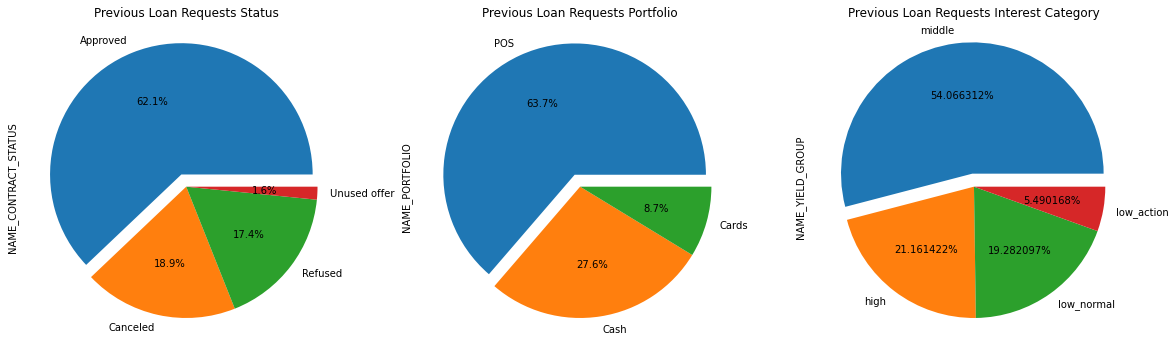

In [83]:
plt.figure(figsize=[20,20])
plt.subplot(1,3,1)
Explode=list(np.zeros(df1['NAME_CONTRACT_STATUS'].value_counts().shape[0]))
Explode[0]=0.1
df1['NAME_CONTRACT_STATUS'].value_counts().plot.pie(explode=Explode,autopct='%1.1f%%')
plt.title("Previous Loan Requests Status", fontsize=12)
plt.subplot(1,3,2)
Explode=list(np.zeros(df1['NAME_PORTFOLIO'].value_counts().shape[0]))
Explode[0]=0.1
df1['NAME_PORTFOLIO'].value_counts().plot.pie(explode=Explode,autopct='%1.1f%%')
plt.title("Previous Loan Requests Portfolio", fontsize=12)
plt.subplot(1,3,3)
Explode=list(np.zeros(df1['NAME_YIELD_GROUP'].value_counts().shape[0]))
Explode[0]=0.1
df1['NAME_YIELD_GROUP'].value_counts().plot.pie(explode=Explode,autopct='%1f%%')
plt.title("Previous Loan Requests Interest Category", fontsize=12)
plt.show()

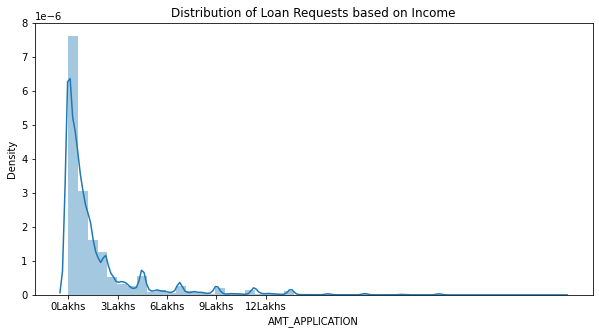

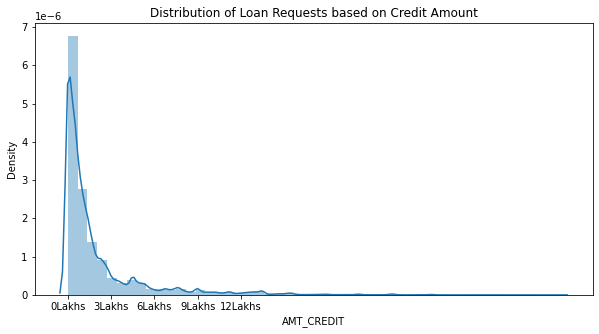

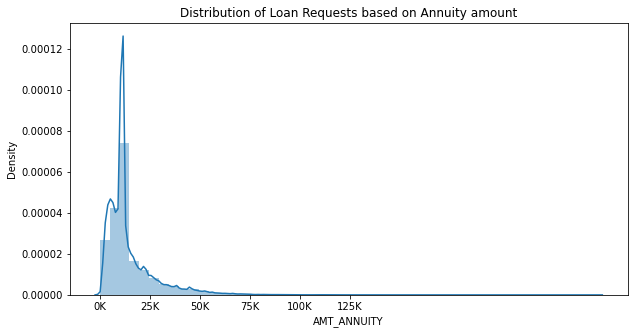

In [84]:
plt.figure(figsize=[10,5])
ticks = np.arange(0, 1500000, 300000)
labels = ["{}Lakhs".format(i//100000) for i in ticks]
sns.distplot(df1.AMT_APPLICATION, bins=50)
plt.xticks(ticks, labels)
plt.title("Distribution of Loan Requests based on Income", fontsize=12)
ticks = np.arange(0, 1500000, 300000)
labels = ["{}Lakhs".format(i//100000) for i in ticks]
plt.show()
plt.figure(figsize=[10,5])
sns.distplot(df1.AMT_CREDIT, bins=50)
plt.xticks(ticks, labels)
plt.title("Distribution of Loan Requests based on Credit Amount", fontsize=12)
plt.show()
ticks = np.arange(0, 150000, 25000)
labels = ["{}K".format(round(i/1000)) for i in ticks]
plt.figure(figsize=[10,5])
sns.distplot(df1.AMT_ANNUITY, bins=50)
plt.xticks(ticks, labels)
plt.title("Distribution of Loan Requests based on Annuity amount", fontsize=12)
plt.show()

### Bi Variate Analysis

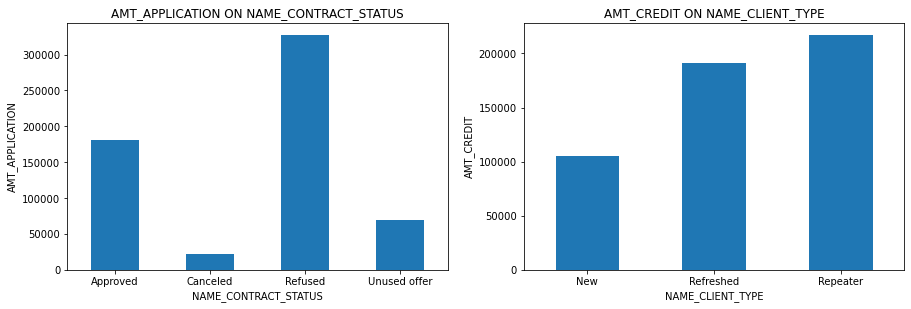

In [85]:
## Plot a line graph
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
df1.groupby(['NAME_CONTRACT_STATUS'])['AMT_APPLICATION'].mean().plot.bar()
plt.title("AMT_APPLICATION ON NAME_CONTRACT_STATUS", fontsize=12)
plt.ylabel('AMT_APPLICATION')
plt.xticks(rotation=0)
plt.subplot(2,2,2)
df1.groupby(['NAME_CLIENT_TYPE'])['AMT_CREDIT'].mean().plot.bar()
plt.title("AMT_CREDIT ON NAME_CLIENT_TYPE", fontsize=12)
plt.ylabel('AMT_CREDIT')
plt.xticks(rotation=0)
plt.show()

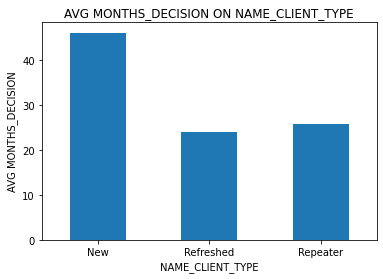

In [86]:
df1.groupby(['NAME_CLIENT_TYPE'])['MONTHS_DECISION'].mean().plot.bar()
plt.title("AVG MONTHS_DECISION ON NAME_CLIENT_TYPE", fontsize=12)
plt.ylabel('AVG MONTHS_DECISION')
plt.xticks(rotation=0)
plt.show()

### Multi Variate Analysis

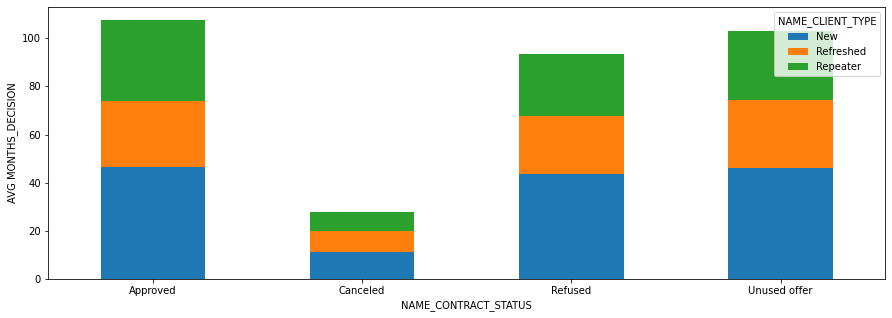

In [87]:
multi = pd.pivot_table(data=df1, values="MONTHS_DECISION", index="NAME_CONTRACT_STATUS", columns="NAME_CLIENT_TYPE",aggfunc=np.mean)
multi.plot(kind="bar", stacked="True", figsize=[15,5])
plt.xticks(rotation=0)
plt.ylabel('AVG MONTHS_DECISION')
plt.show()

In [88]:
multi

NAME_CLIENT_TYPE            New  Refreshed   Repeater
NAME_CONTRACT_STATUS                                 
Approved              46.694742  27.028632  33.843736
Canceled              11.175127   8.536582   7.886653
Refused               43.731034  24.077780  25.575876
Unused offer          46.132706  28.313433  28.723535

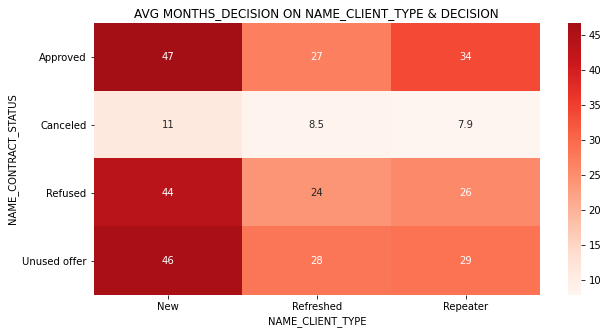

In [89]:
plt.figure(figsize=[10,5])
sns.heatmap(multi, annot= True, cmap="Reds", center= 30)
plt.title("AVG MONTHS_DECISION ON NAME_CLIENT_TYPE & DECISION", fontsize=12)
plt.yticks(rotation=0)
plt.show()

#### Merged Data Set

In [90]:
df3 = pd.merge(left=df,right=df1, how='left', left_on='SK_ID_CURR', suffixes=('_CURR', '_PREV'), right_on='SK_ID_CURR')
df3.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CURR CODE_GENDER FLAG_OWN_CAR  \
0      100002       1              Cash loans           M            N   
1      100003       0              Cash loans           F            N   
2      100003       0              Cash loans           F            N   
3      100003       0              Cash loans           F            N   
4      100004       0         Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
0               Y             0          202500.0         406597.5   
1               N             0          270000.0        1293502.5   
2               N             0          270000.0        1293502.5   
3               N             0          270000.0        1293502.5   
4               Y             0           67500.0         135000.0   

   AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           24700.5              351000.0   Unaccompanied          Working   
1           35698.5             1129500.0          Family    State servant   
2           35698.5             1129500.0          Family    State servant   
3           35698.5             1129500.0          Family    State servant   
4            6750.0              135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers                1   
1                    0.003541      Core staff                2   
2                    0.003541      Core staff                2   
3                    0.003541      Core staff                2   
4                    0.010032        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY                       10  Business Entity Type 3   
1                     MONDAY                       11                  School   
2                     MONDAY                       11                  School   
3                     MONDAY                       11                  School   
4                     MONDAY                        9              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                   -1134   
1                         1                         0                    -828   
2                         1                         0                    -828   
3                         1                         0                    -828   
4                         0                         0                    -815   

  AGE_GROUP  JOB_EXP  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0  18 to 30  Up to 5                  10                 6   
1  41 to 50  Up to 5          

In [91]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386546 entries, 0 to 1386545
Data columns (total 51 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1386546 non-null  int64  
 1   TARGET                       1386546 non-null  int64  
 2   NAME_CONTRACT_TYPE_CURR      1386546 non-null  object 
 3   CODE_GENDER                  1386546 non-null  object 
 4   FLAG_OWN_CAR                 1386546 non-null  object 
 5   FLAG_OWN_REALTY              1386546 non-null  object 
 6   CNT_CHILDREN                 1386546 non-null  int64  
 7   AMT_INCOME_TOTAL             1386546 non-null  float64
 8   AMT_CREDIT_CURR              1386546 non-null  float64
 9   AMT_ANNUITY_CURR             1386546 non-null  float64
 10  AMT_GOODS_PRICE_CURR         1386546 non-null  float64
 11  NAME_TYPE_SUITE              1386546 non-null  object 
 12  NAME_INCOME_TYPE             1386546 non-n

#### SK_ID_PREV as object

In [92]:
df3['SK_ID_PREV']=df3['SK_ID_PREV'].astype(dtype='object')

In [93]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386546 entries, 0 to 1386545
Data columns (total 51 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1386546 non-null  int64  
 1   TARGET                       1386546 non-null  int64  
 2   NAME_CONTRACT_TYPE_CURR      1386546 non-null  object 
 3   CODE_GENDER                  1386546 non-null  object 
 4   FLAG_OWN_CAR                 1386546 non-null  object 
 5   FLAG_OWN_REALTY              1386546 non-null  object 
 6   CNT_CHILDREN                 1386546 non-null  int64  
 7   AMT_INCOME_TOTAL             1386546 non-null  float64
 8   AMT_CREDIT_CURR              1386546 non-null  float64
 9   AMT_ANNUITY_CURR             1386546 non-null  float64
 10  AMT_GOODS_PRICE_CURR         1386546 non-null  float64
 11  NAME_TYPE_SUITE              1386546 non-null  object 
 12  NAME_INCOME_TYPE             1386546 non-n

In [94]:
df3.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CURR CODE_GENDER FLAG_OWN_CAR  \
0      100002       1              Cash loans           M            N   
1      100003       0              Cash loans           F            N   
2      100003       0              Cash loans           F            N   
3      100003       0              Cash loans           F            N   
4      100004       0         Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
0               Y             0          202500.0         406597.5   
1               N             0          270000.0        1293502.5   
2               N             0          270000.0        1293502.5   
3               N             0          270000.0        1293502.5   
4               Y             0           67500.0         135000.0   

   AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           24700.5              351000.0   Unaccompanied          Working   
1           35698.5             1129500.0          Family    State servant   
2           35698.5             1129500.0          Family    State servant   
3           35698.5             1129500.0          Family    State servant   
4            6750.0              135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers                1   
1                    0.003541      Core staff                2   
2                    0.003541      Core staff                2   
3                    0.003541      Core staff                2   
4                    0.010032        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY                       10  Business Entity Type 3   
1                     MONDAY                       11                  School   
2                     MONDAY                       11                  School   
3                     MONDAY                       11                  School   
4                     MONDAY                        9              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                   -1134   
1                         1                         0                    -828   
2                         1                         0                    -828   
3                         1                         0                    -828   
4                         0                         0                    -815   

  AGE_GROUP  JOB_EXP  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0  18 to 30  Up to 5                  10                 6   
1  41 to 50  Up to 5          

In [95]:
x=pd.DataFrame(df3[~(df3.SK_ID_PREV.isnull())].groupby('SK_ID_CURR')['SK_ID_PREV'].count())
x.head()

SK_ID_PREV
SK_ID_CURR            
100002               1
100003               3
100004               1
100006               9
100007               6

In [96]:
df3 = pd.merge(left=df3,right=x, how='left', left_on='SK_ID_CURR', right_on=x.index)
df3.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CURR CODE_GENDER FLAG_OWN_CAR  \
0      100002       1              Cash loans           M            N   
1      100003       0              Cash loans           F            N   
2      100003       0              Cash loans           F            N   
3      100003       0              Cash loans           F            N   
4      100004       0         Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
0               Y             0          202500.0         406597.5   
1               N             0          270000.0        1293502.5   
2               N             0          270000.0        1293502.5   
3               N             0          270000.0        1293502.5   
4               Y             0           67500.0         135000.0   

   AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           24700.5              351000.0   Unaccompanied          Working   
1           35698.5             1129500.0          Family    State servant   
2           35698.5             1129500.0          Family    State servant   
3           35698.5             1129500.0          Family    State servant   
4            6750.0              135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801        Laborers                1   
1                    0.003541      Core staff                2   
2                    0.003541      Core staff                2   
3                    0.003541      Core staff                2   
4                    0.010032        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0                  WEDNESDAY                       10  Business Entity Type 3   
1                     MONDAY                       11                  School   
2                     MONDAY                       11                  School   
3                     MONDAY                       11                  School   
4                     MONDAY                        9              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                         2                         2   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                   -1134   
1                         1                         0                    -828   
2                         1                         0                    -828   
3                         1                         0                    -828   
4                         0                         0                    -815   

  AGE_GROUP  JOB_EXP  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0  18 to 30  Up to 5                  10                 6   
1  41 to 50  Up to 5          

In [97]:
df3.rename(columns = {'SK_ID_PREV_y':'PREV_LOAN_CNT'}, inplace = True)
df3.rename(columns = {'SK_ID_PREV_x':'SK_ID_PREV'}, inplace = True)
df3.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CURR CODE_GENDER FLAG_OWN_CAR  \
0       100002       1              Cash loans           M            N   
1       100003       0              Cash loans           F            N   
2       100003       0              Cash loans           F            N   
3       100003       0              Cash loans           F            N   
4       100004       0         Revolving loans           M            Y   
5       100006       0              Cash loans           F            N   
6       100006       0              Cash loans           F            N   
7       100006       0              Cash loans           F            N   
8       100006       0              Cash loans           F            N   
9       100006       0              Cash loans           F            N   
10      100006       0              Cash loans           F            N   
11      100006       0              Cash loans           F            N   
12      100006       0              Cash loans           F            N   
13      100006       0              Cash loans           F            N   
14      100007       0              Cash loans           M            N   
15      100007       0              Cash loans           M            N   
16      100007       0              Cash loans           M            N   
17      100007       0              Cash loans           M            N   
18      100007       0              Cash loans           M            N   
19      100007       0              Cash loans           M            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
0                Y             0          202500.0         406597.5   
1                N             0          270000.0        1293502.5   
2                N             0          270000.0        1293502.5   
3                N             0          270000.0        1293502.5   
4                Y             0           67500.0         135000.0   
5                Y             0          135000.0         312682.5   
6                Y             0          135000.0         312682.5   
7                Y             0          135000.0         312682.5   
8                Y             0          135000.0         312682.5   
9                Y             0          135000.0         312682.5   
10               Y             0          135000.0         312682.5   
11               Y             0          135000.0         312682.5   
12               Y             0          135000.0         312682.5   
13               Y             0          135000.0         312682.5   
14               Y             0          121500.0         513000.0   
15               Y             0          121500.0         513000.0   
16               Y             0          121500.0         513000.0   
17               Y             0          121500.0         513000.0   
18               Y             0          121500.0         513000.0   
19               Y             0          121500.0         513000.0   

    AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0            24700.5              351000.0   Unaccompanied          Working   
1            35698.5             1129500.0          Family    State servant   
2            35698.5             1129500.0          Family    State servant   
3            35698.5             1129500.0          Family    State servant   
4             6750.0              135000.0   Unaccompanied          Working   
5            29686.5              297000.0   Unaccompanied          Working   
6            29686.5              297000.0   Unaccompanied          Working   
7            29686.5              297000.0   Unaccompanied          Working   
8            29686.5              297000.0   Unaccompanied          Working   
9            29686.5              297000.0   Unaccompanied          Working   
10           29686.5              297000.0   Unaccompanied         

In [98]:
df3.groupby('AGE_GROUP')['PREV_LOAN_CNT'].median()

AGE_GROUP
18 to 30           6.0
31 to 40           7.0
41 to 50           7.0
51 to 60           7.0
Greater than 60    8.0
Name: PREV_LOAN_CNT, dtype: float64

In [99]:
df3.PREV_LOAN_CNT.fillna(value=0,inplace=True)

### Bivariate Analysis

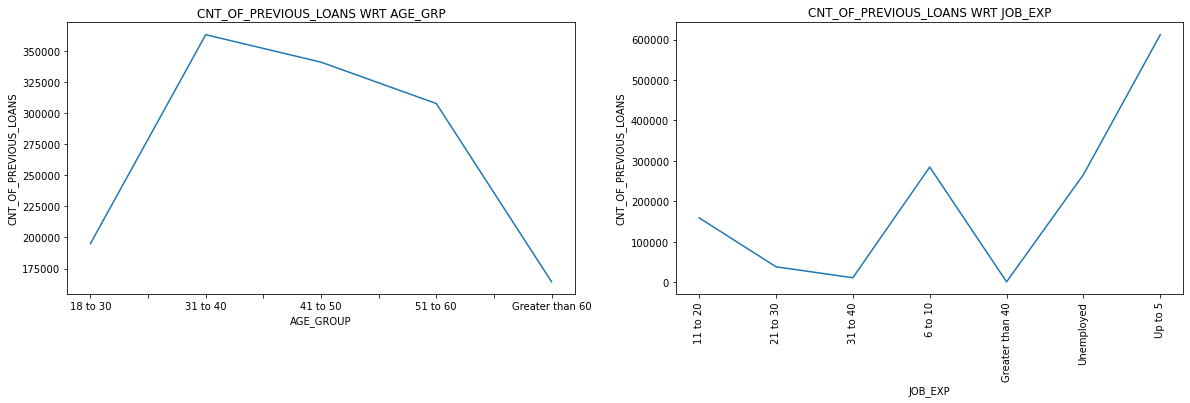

In [100]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title("CNT_OF_PREVIOUS_LOANS WRT AGE_GRP", fontsize=12)
df3.groupby('AGE_GROUP')['SK_ID_PREV'].count().plot()
plt.ylabel('CNT_OF_PREVIOUS_LOANS')
plt.subplot(1,2,2)
plt.title("CNT_OF_PREVIOUS_LOANS WRT JOB_EXP", fontsize=12)
df3.groupby('JOB_EXP')['SK_ID_PREV'].count().plot()
plt.ylabel('CNT_OF_PREVIOUS_LOANS')
plt.xticks(rotation=90)
plt.show()

#### Multi Variate Analysis

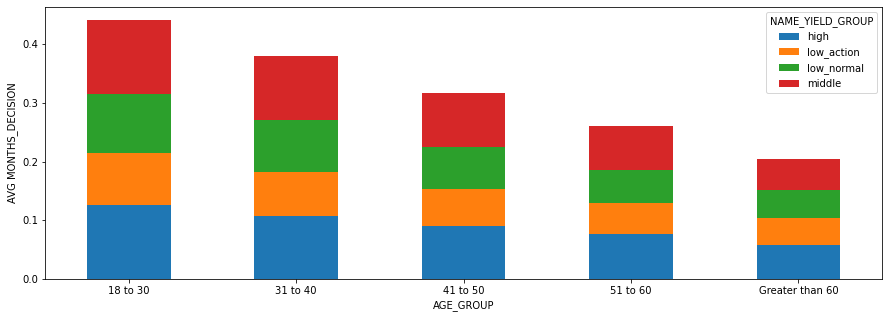

In [101]:
multi = pd.pivot_table(data=df3, values="TARGET", index="AGE_GROUP", columns="NAME_YIELD_GROUP",aggfunc=np.mean)
multi.plot(kind="bar", stacked="True", figsize=[15,5])
plt.xticks(rotation=0)
plt.ylabel('AVG MONTHS_DECISION')
plt.show()

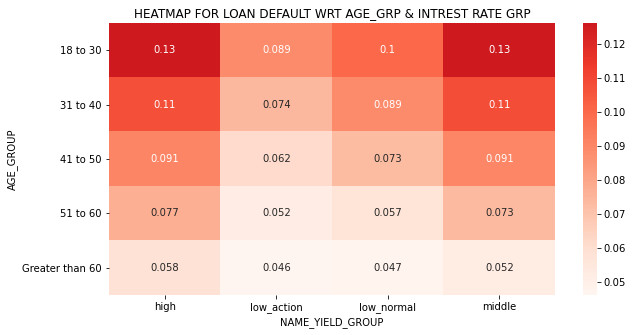

In [102]:
plt.figure(figsize=[10,5])
plt.title("HEATMAP FOR LOAN DEFAULT WRT AGE_GRP & INTREST RATE GRP", fontsize=12)
sns.heatmap(multi, annot= True, cmap="Reds", center= 0.1)
plt.yticks(rotation=0)
plt.show()

#### Thankyou